# Fashion MNIST Model Training and Testing

This Jupyter Notebook is used to train and test various models on the Fashion MNIST dataset. 

In [10]:
import torch
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
import torchvision.models as models

In [2]:
import sys
sys.path.append("../scripts")

from train_utils import train_and_validate
from test_model import test_model

## Dataset import

In [3]:
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transforms.ToTensor())

In [4]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Normalization

In [5]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

In [6]:
train_data.transform = transform
test_data.transform = transform

## Validation set definition

In [7]:
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size

In [8]:
train_data, valid_data = torch.utils.data.random_split(train_data, [train_size, val_size])

## Creating dataloaders

In [9]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

# Model training and testing

## Custom CNN

### First simple CNN

In [30]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Caricamento dei dati di addestramento, validazione e test
train_data = datasets.FashionMNIST(root='data', train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root='data', train=False, download=True, transform=transform)

# Suddivisione del dataset di addestramento in addestramento e validazione
train_size = int(0.8 * len(train_data))
val_size = len(train_data) - train_size
train_data, valid_data = torch.utils.data.random_split(train_data, [train_size, val_size])

# Data augmentation per il dataset di addestramento
train_data_aug = datasets.FashionMNIST(root='data', train=True, download=True, transform=transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
]))

# Creazione dei loader per i dati di addestramento, validazione e test
train_loader = torch.utils.data.DataLoader(train_data_aug, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=64, shuffle=False)

In [31]:
class FirstCustomCNN(nn.Module):
    def __init__(self):
        super(FirstCustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 32 * 7 * 7)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x
    
model1 = FirstCustomCNN()

In [32]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model1.parameters(), lr=0.0001)

Epoch [1/50], Train Loss: 0.8940, Train Acc: 71.10%, Valid Loss: 0.5619, Valid Acc: 79.66%
Epoch [2/50], Train Loss: 0.5466, Train Acc: 80.41%, Valid Loss: 0.4819, Valid Acc: 82.83%
Epoch [3/50], Train Loss: 0.4816, Train Acc: 82.86%, Valid Loss: 0.4421, Valid Acc: 84.13%
Epoch [4/50], Train Loss: 0.4465, Train Acc: 84.14%, Valid Loss: 0.4147, Valid Acc: 85.16%
Epoch [5/50], Train Loss: 0.4200, Train Acc: 85.18%, Valid Loss: 0.3831, Valid Acc: 86.52%
Epoch [6/50], Train Loss: 0.4016, Train Acc: 85.65%, Valid Loss: 0.3732, Valid Acc: 87.02%
Epoch [7/50], Train Loss: 0.3862, Train Acc: 86.28%, Valid Loss: 0.3497, Valid Acc: 87.67%
Epoch [8/50], Train Loss: 0.3726, Train Acc: 86.61%, Valid Loss: 0.3384, Valid Acc: 88.11%
Epoch [9/50], Train Loss: 0.3652, Train Acc: 86.94%, Valid Loss: 0.3295, Valid Acc: 88.28%
Epoch [10/50], Train Loss: 0.3553, Train Acc: 87.28%, Valid Loss: 0.3199, Valid Acc: 88.65%
Epoch [11/50], Train Loss: 0.3461, Train Acc: 87.59%, Valid Loss: 0.3145, Valid Acc: 88.7

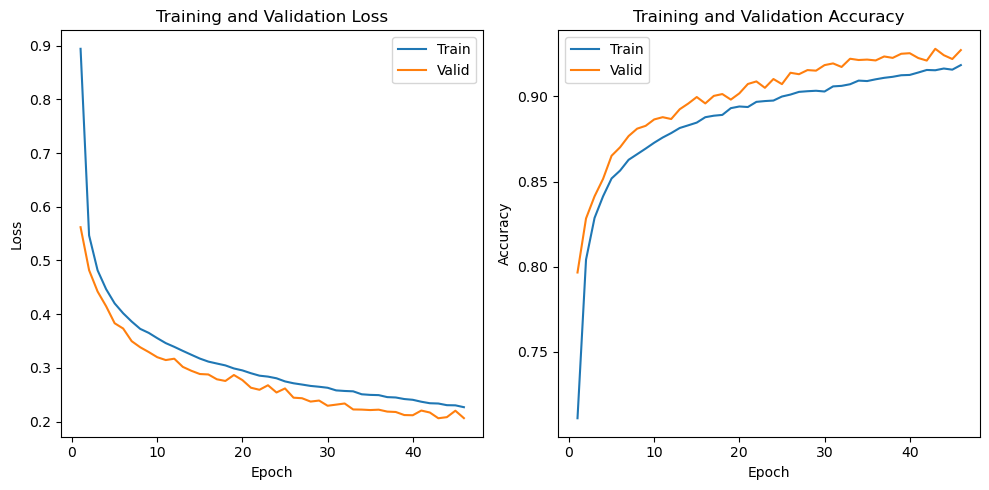

In [33]:
train_and_validate(model1, train_loader, valid_loader, criterion, optimizer, num_epochs=50, patience=3, plot=True, seed=42)

Test Accuracy: 90.39%
Precision: 0.9043
Recall: 0.9039
F1 Score: 0.9034


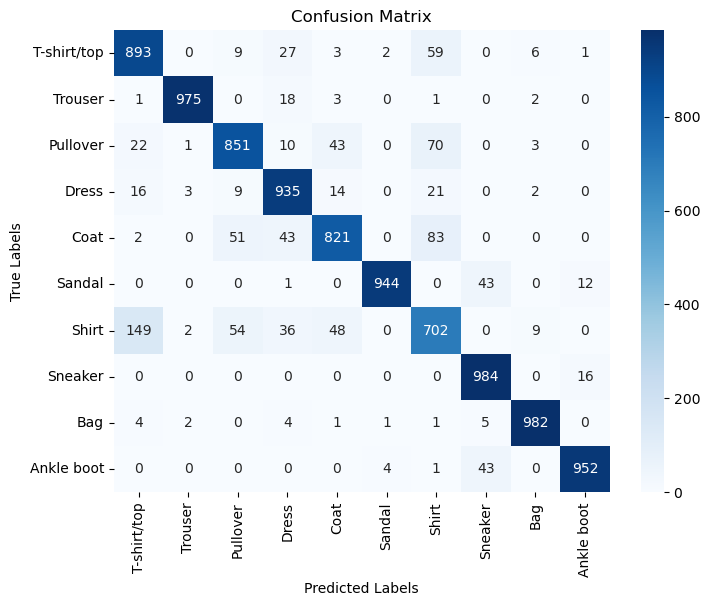

In [34]:
test_model(model1, test_loader, classes, seed=42)

regolarizzo con dropout ovunque la prima rete

In [35]:
class FirstCustomCNNRegularized(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super(FirstCustomCNNRegularized, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout1 = nn.Dropout2d(p=dropout_prob)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.dropout2 = nn.Dropout2d(p=dropout_prob)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.relu3 = nn.ReLU()
        self.dropout3 = nn.Dropout(p=dropout_prob)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.dropout1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = self.dropout2(x)
        x = x.view(-1, 32 * 7 * 7)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.dropout3(x)
        x = self.fc2(x)
        return x

model2 = FirstCustomCNNRegularized()

Epoch [1/100], Train Loss: 1.2910, Train Acc: 55.28%, Valid Loss: 0.6762, Valid Acc: 74.86%
Epoch [2/100], Train Loss: 0.8140, Train Acc: 71.69%, Valid Loss: 0.5924, Valid Acc: 77.69%
Epoch [3/100], Train Loss: 0.7207, Train Acc: 74.59%, Valid Loss: 0.5383, Valid Acc: 79.47%
Epoch [4/100], Train Loss: 0.6708, Train Acc: 76.45%, Valid Loss: 0.5012, Valid Acc: 81.57%
Epoch [5/100], Train Loss: 0.6355, Train Acc: 77.45%, Valid Loss: 0.4732, Valid Acc: 82.68%
Epoch [6/100], Train Loss: 0.6092, Train Acc: 78.60%, Valid Loss: 0.4535, Valid Acc: 83.26%
Epoch [7/100], Train Loss: 0.5857, Train Acc: 79.44%, Valid Loss: 0.4382, Valid Acc: 83.86%
Epoch [8/100], Train Loss: 0.5705, Train Acc: 79.91%, Valid Loss: 0.4264, Valid Acc: 84.38%
Epoch [9/100], Train Loss: 0.5541, Train Acc: 80.49%, Valid Loss: 0.4109, Valid Acc: 84.64%
Epoch [10/100], Train Loss: 0.5475, Train Acc: 81.05%, Valid Loss: 0.4034, Valid Acc: 85.12%
Epoch [11/100], Train Loss: 0.5332, Train Acc: 81.26%, Valid Loss: 0.3947, Vali

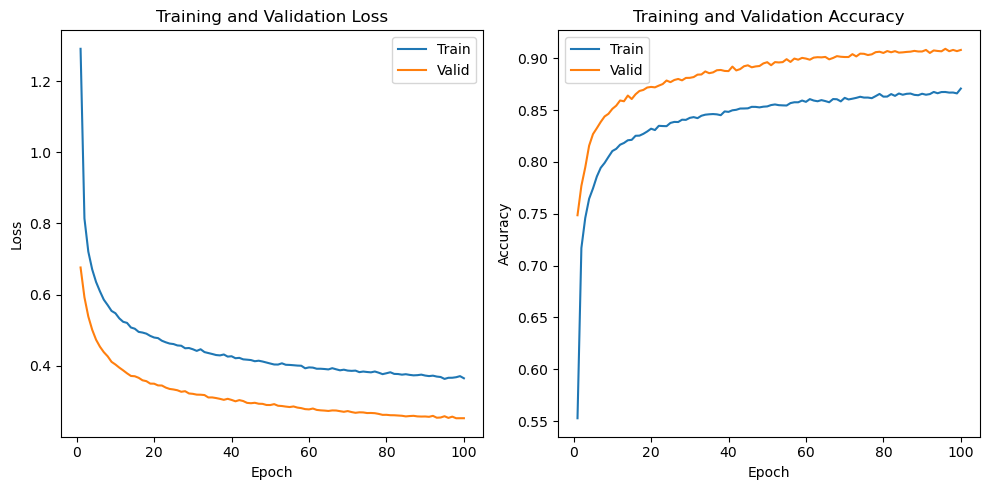

Test Accuracy: 89.34%
Precision: 0.8937
Recall: 0.8934
F1 Score: 0.8921


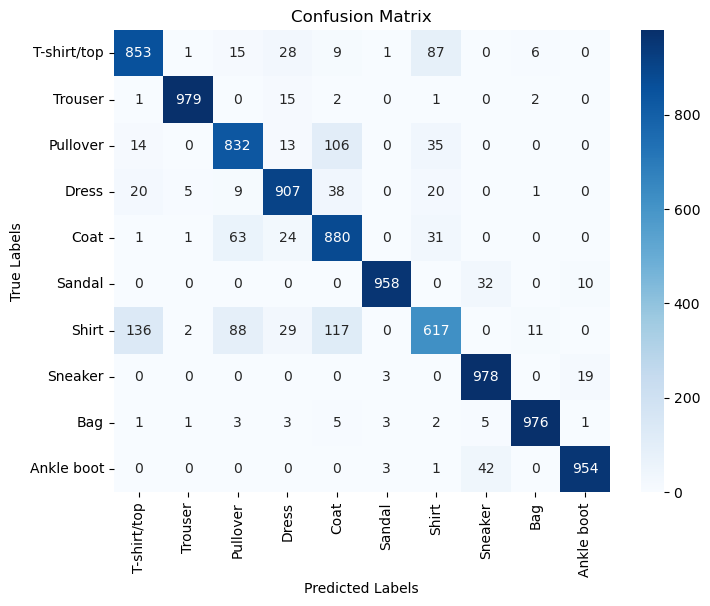

In [36]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model2.parameters(), lr=0.0001)

train_and_validate(model2, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model2, test_loader, classes, seed=42)

In [37]:
class FirstCustomCNNL2Regularized(nn.Module):
    def __init__(self, lambda_reg=0.01):
        super(FirstCustomCNNL2Regularized, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)
        self.lambda_reg = lambda_reg

    def forward(self, x):
        x = self.pool1(F.relu(self.conv1(x)))
        x = self.pool1(F.relu(self.conv2(x)))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

    def l2_regularization_loss(self):
        l2_loss = 0.0
        for param in self.parameters():
            l2_loss += torch.norm(param)**2
        return 0.5 * self.lambda_reg * l2_loss

# Creazione dell'istanza del modello con regolarizzazione L2
model3 = FirstCustomCNNL2Regularized(lambda_reg=0.01)

Epoch [1/50], Train Loss: 0.8620, Train Acc: 71.62%, Valid Loss: 0.5732, Valid Acc: 79.13%
Epoch [2/50], Train Loss: 0.5540, Train Acc: 80.03%, Valid Loss: 0.4936, Valid Acc: 82.48%
Epoch [3/50], Train Loss: 0.4920, Train Acc: 82.31%, Valid Loss: 0.4597, Valid Acc: 83.16%
Epoch [4/50], Train Loss: 0.4544, Train Acc: 83.80%, Valid Loss: 0.4168, Valid Acc: 85.06%
Epoch [5/50], Train Loss: 0.4265, Train Acc: 84.73%, Valid Loss: 0.3885, Valid Acc: 86.52%
Epoch [6/50], Train Loss: 0.4079, Train Acc: 85.26%, Valid Loss: 0.3734, Valid Acc: 86.83%
Epoch [7/50], Train Loss: 0.3913, Train Acc: 85.94%, Valid Loss: 0.3529, Valid Acc: 87.49%
Epoch [8/50], Train Loss: 0.3773, Train Acc: 86.41%, Valid Loss: 0.3410, Valid Acc: 88.09%
Epoch [9/50], Train Loss: 0.3677, Train Acc: 86.72%, Valid Loss: 0.3338, Valid Acc: 88.05%
Epoch [10/50], Train Loss: 0.3601, Train Acc: 86.98%, Valid Loss: 0.3329, Valid Acc: 87.96%
Epoch [11/50], Train Loss: 0.3492, Train Acc: 87.43%, Valid Loss: 0.3134, Valid Acc: 88.8

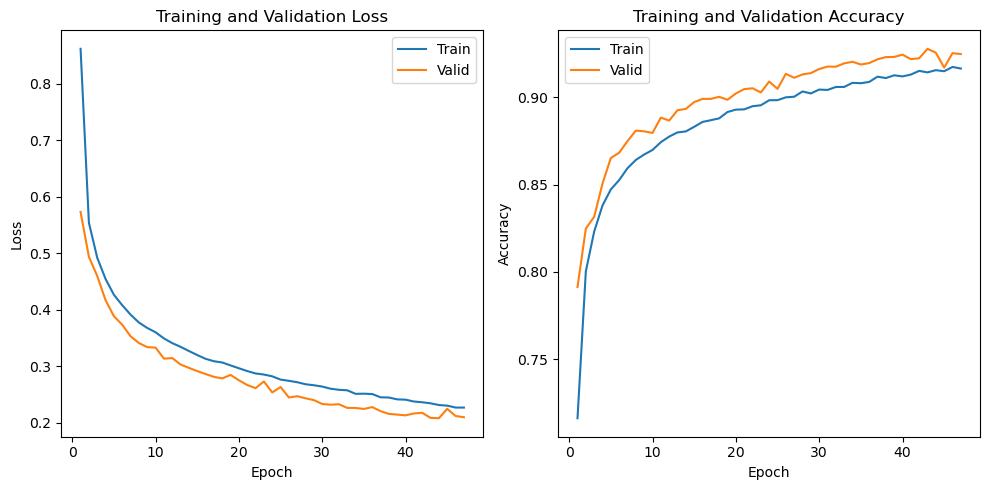

Test Accuracy: 90.42%
Precision: 0.9047
Recall: 0.9042
F1 Score: 0.9035


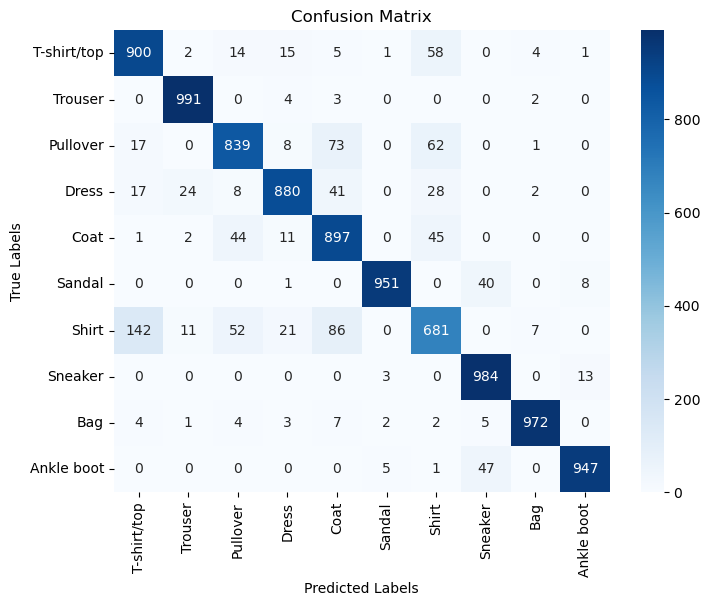

In [38]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model3.parameters(), lr=0.0001)

train_and_validate(model3, train_loader, valid_loader, criterion, optimizer, num_epochs=50, patience=3, plot=True, seed=42)

test_model(model3, test_loader, classes, seed=42)

In [39]:
class CustomCNN_BN(nn.Module):
    def __init__(self):
        super(CustomCNN_BN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  # Batch normalization dopo il primo layer convoluzionale
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  # Batch normalization dopo il secondo layer convoluzionale
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.bn3 = nn.BatchNorm1d(128)  # Batch normalization dopo il primo layer completamente connesso
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.bn3(self.fc1(x)))
        x = self.fc2(x)
        return x

Epoch [1/100], Train Loss: 0.6537, Train Acc: 80.96%, Valid Loss: 0.3869, Valid Acc: 87.55%
Epoch [2/100], Train Loss: 0.3916, Train Acc: 86.74%, Valid Loss: 0.3093, Valid Acc: 89.42%
Epoch [3/100], Train Loss: 0.3346, Train Acc: 88.20%, Valid Loss: 0.2767, Valid Acc: 90.35%
Epoch [4/100], Train Loss: 0.3078, Train Acc: 89.06%, Valid Loss: 0.2560, Valid Acc: 90.90%
Epoch [5/100], Train Loss: 0.2877, Train Acc: 89.67%, Valid Loss: 0.2323, Valid Acc: 91.68%
Epoch [6/100], Train Loss: 0.2731, Train Acc: 90.22%, Valid Loss: 0.2264, Valid Acc: 91.84%
Epoch [7/100], Train Loss: 0.2637, Train Acc: 90.56%, Valid Loss: 0.2161, Valid Acc: 92.21%
Epoch [8/100], Train Loss: 0.2529, Train Acc: 90.88%, Valid Loss: 0.2118, Valid Acc: 92.37%
Epoch [9/100], Train Loss: 0.2466, Train Acc: 91.03%, Valid Loss: 0.2054, Valid Acc: 92.55%
Epoch [10/100], Train Loss: 0.2387, Train Acc: 91.51%, Valid Loss: 0.1954, Valid Acc: 93.11%
Epoch [11/100], Train Loss: 0.2331, Train Acc: 91.51%, Valid Loss: 0.1898, Vali

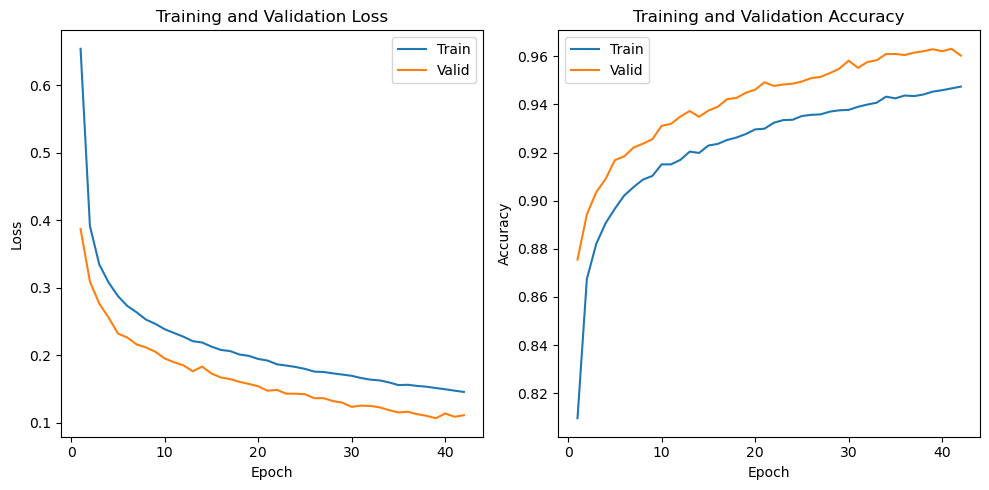

Test Accuracy: 91.96%
Precision: 0.9199
Recall: 0.9196
F1 Score: 0.9195


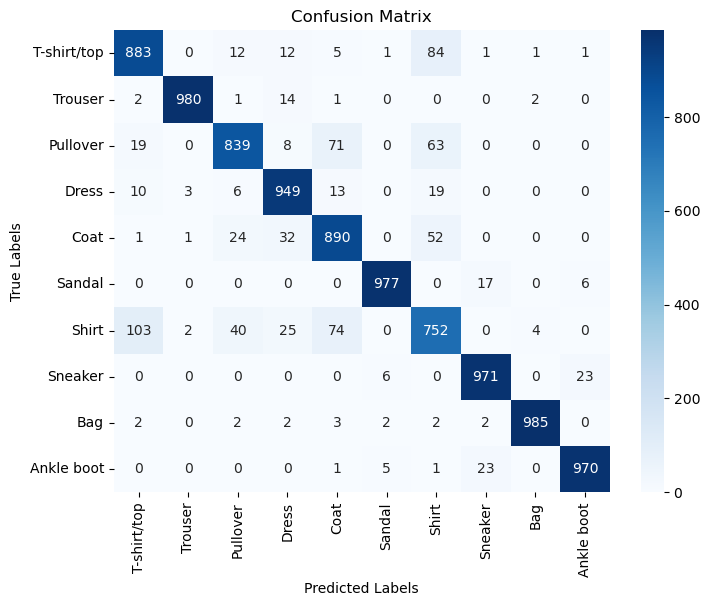

In [40]:
model4 = CustomCNN_BN()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model4.parameters(), lr=0.0001)

train_and_validate(model4, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model4, test_loader, classes, seed=42)


In [41]:
class CustomCNN_BN_dropout(nn.Module):
    def __init__(self):
        super(CustomCNN_BN_dropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(16)  # Batch normalization dopo il primo layer convoluzionale
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(32)  # Batch normalization dopo il secondo layer convoluzionale
        self.fc1 = nn.Linear(32 * 7 * 7, 128)
        self.dropout = nn.Dropout(p=0.5)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))
        x = self.pool(F.relu(self.bn2(self.conv2(x))))
        x = x.view(-1, 32 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)
        return x
        

Epoch [1/100], Train Loss: 0.7954, Train Acc: 72.76%, Valid Loss: 0.4626, Valid Acc: 83.53%
Epoch [2/100], Train Loss: 0.5161, Train Acc: 81.86%, Valid Loss: 0.3843, Valid Acc: 86.17%
Epoch [3/100], Train Loss: 0.4506, Train Acc: 84.13%, Valid Loss: 0.3471, Valid Acc: 87.42%
Epoch [4/100], Train Loss: 0.4167, Train Acc: 85.28%, Valid Loss: 0.3171, Valid Acc: 88.55%
Epoch [5/100], Train Loss: 0.3938, Train Acc: 86.00%, Valid Loss: 0.3003, Valid Acc: 88.90%
Epoch [6/100], Train Loss: 0.3766, Train Acc: 86.66%, Valid Loss: 0.2942, Valid Acc: 89.24%
Epoch [7/100], Train Loss: 0.3636, Train Acc: 87.03%, Valid Loss: 0.2809, Valid Acc: 89.88%
Epoch [8/100], Train Loss: 0.3522, Train Acc: 87.32%, Valid Loss: 0.2807, Valid Acc: 89.76%
Epoch [9/100], Train Loss: 0.3430, Train Acc: 87.74%, Valid Loss: 0.2659, Valid Acc: 89.98%
Epoch [10/100], Train Loss: 0.3385, Train Acc: 87.85%, Valid Loss: 0.2584, Valid Acc: 90.53%
Epoch [11/100], Train Loss: 0.3285, Train Acc: 88.00%, Valid Loss: 0.2559, Vali

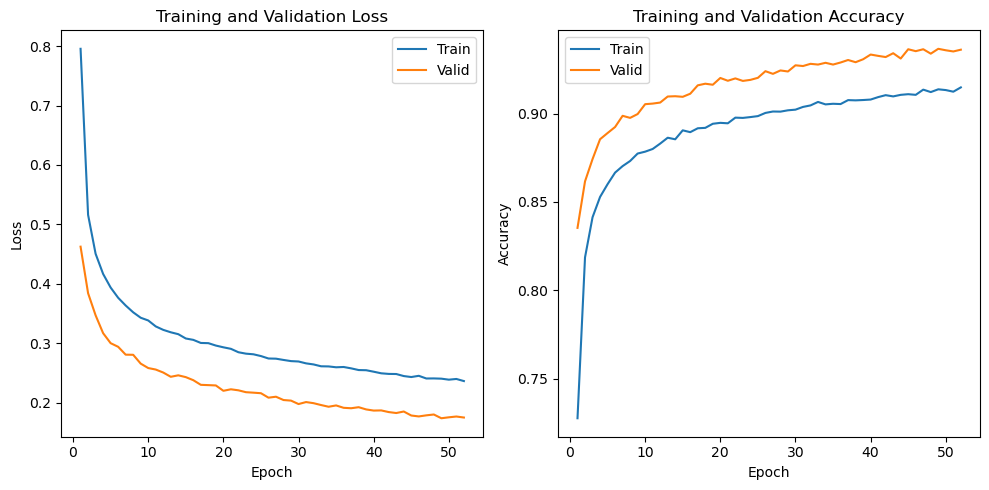

Test Accuracy: 91.14%
Precision: 0.9123
Recall: 0.9114
F1 Score: 0.9115


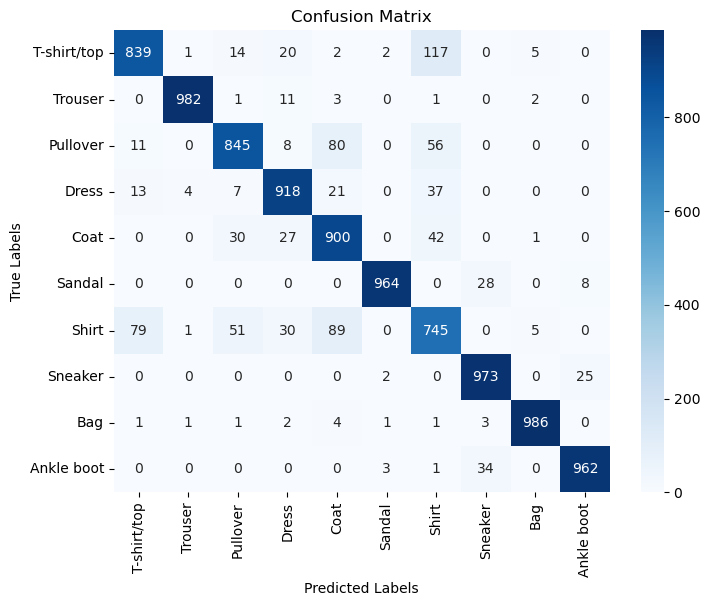

In [42]:
model5 = CustomCNN_BN_dropout()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model5.parameters(), lr=0.0001)

train_and_validate(model5, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model5, test_loader, classes, seed=42)

### Second CNN

piu profonda

In [43]:
class SecondCustomCNN(nn.Module):
    def __init__(self):
        super(SecondCustomCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool(x)
        x = x.view(-1, 128 * 7 * 7)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        return x
    
model_deep = SecondCustomCNN()

Epoch [1/100], Train Loss: 0.6561, Train Acc: 76.59%, Valid Loss: 0.4329, Valid Acc: 84.58%
Epoch [2/100], Train Loss: 0.4337, Train Acc: 84.35%, Valid Loss: 0.3903, Valid Acc: 86.08%
Epoch [3/100], Train Loss: 0.3801, Train Acc: 86.16%, Valid Loss: 0.3456, Valid Acc: 87.42%
Epoch [4/100], Train Loss: 0.3469, Train Acc: 87.29%, Valid Loss: 0.3197, Valid Acc: 88.25%
Epoch [5/100], Train Loss: 0.3197, Train Acc: 88.26%, Valid Loss: 0.2769, Valid Acc: 90.18%
Epoch [6/100], Train Loss: 0.3013, Train Acc: 88.98%, Valid Loss: 0.2741, Valid Acc: 89.96%
Epoch [7/100], Train Loss: 0.2832, Train Acc: 89.61%, Valid Loss: 0.2478, Valid Acc: 91.08%
Epoch [8/100], Train Loss: 0.2691, Train Acc: 90.09%, Valid Loss: 0.2441, Valid Acc: 91.11%
Epoch [9/100], Train Loss: 0.2591, Train Acc: 90.52%, Valid Loss: 0.2273, Valid Acc: 91.80%
Epoch [10/100], Train Loss: 0.2493, Train Acc: 90.78%, Valid Loss: 0.2245, Valid Acc: 91.80%
Epoch [11/100], Train Loss: 0.2387, Train Acc: 91.18%, Valid Loss: 0.2110, Vali

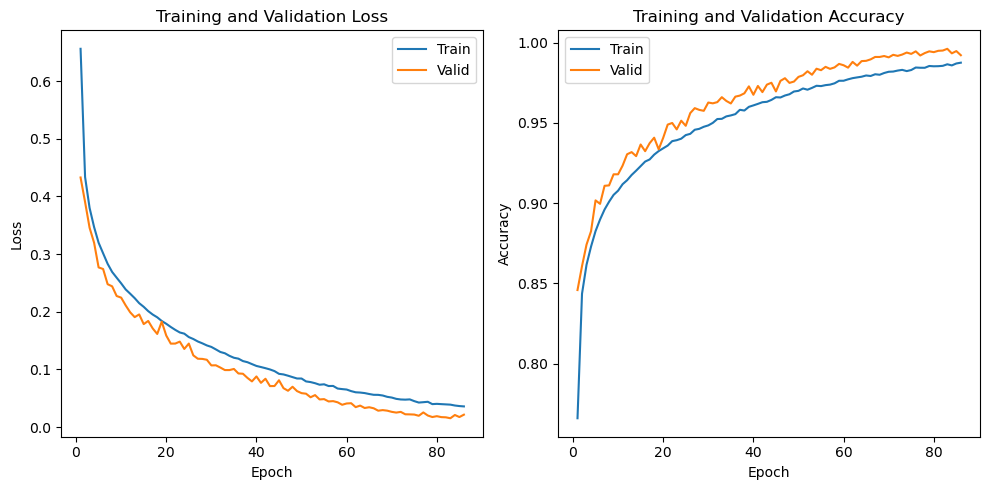

Test Accuracy: 93.09%
Precision: 0.9308
Recall: 0.9309
F1 Score: 0.9302


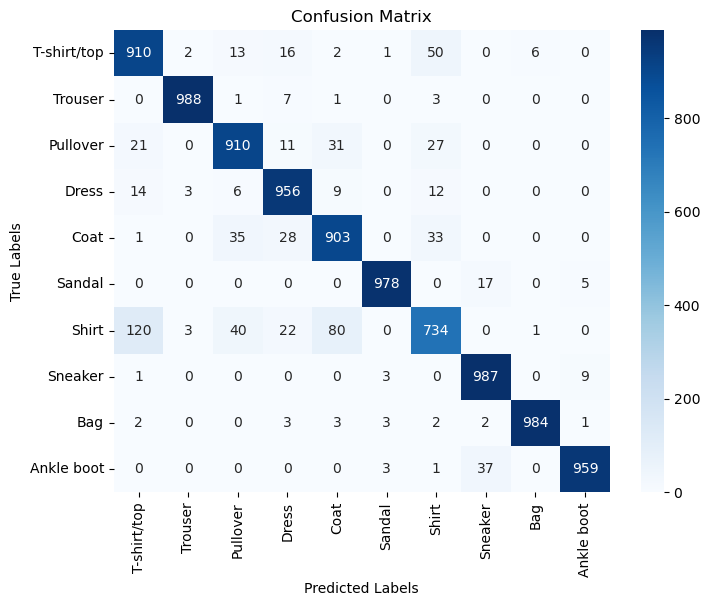

In [44]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deep.parameters(), lr=0.0001)

train_and_validate(model_deep, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_deep, test_loader, classes, seed=42)

In [45]:
class SecondCustomCNNWithDropout(nn.Module):
    def __init__(self, dropout_prob_conv=0.1, dropout_prob_fc=0.5):
        super(SecondCustomCNNWithDropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.dropout1 = nn.Dropout2d(dropout_prob_conv)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.dropout2 = nn.Dropout2d(dropout_prob_conv)
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.relu4 = nn.ReLU()
        self.dropout3 = nn.Dropout(dropout_prob_fc)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.dropout1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.dropout2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool(x)
        x = x.view(-1, 128 * 7 * 7)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout3(x)
        x = self.fc2(x)
        return x
    
model_deep_2 = SecondCustomCNNWithDropout()

Epoch [1/100], Train Loss: 0.7706, Train Acc: 72.53%, Valid Loss: 0.4652, Valid Acc: 83.13%
Epoch [2/100], Train Loss: 0.5082, Train Acc: 81.75%, Valid Loss: 0.3867, Valid Acc: 86.08%
Epoch [3/100], Train Loss: 0.4468, Train Acc: 83.72%, Valid Loss: 0.3526, Valid Acc: 86.98%
Epoch [4/100], Train Loss: 0.4131, Train Acc: 84.93%, Valid Loss: 0.3157, Valid Acc: 88.47%
Epoch [5/100], Train Loss: 0.3853, Train Acc: 85.98%, Valid Loss: 0.2933, Valid Acc: 89.07%
Epoch [6/100], Train Loss: 0.3645, Train Acc: 86.65%, Valid Loss: 0.2905, Valid Acc: 89.34%
Epoch [7/100], Train Loss: 0.3498, Train Acc: 87.34%, Valid Loss: 0.2686, Valid Acc: 90.22%
Epoch [8/100], Train Loss: 0.3332, Train Acc: 87.90%, Valid Loss: 0.2628, Valid Acc: 90.53%
Epoch [9/100], Train Loss: 0.3223, Train Acc: 88.21%, Valid Loss: 0.2549, Valid Acc: 90.67%
Epoch [10/100], Train Loss: 0.3159, Train Acc: 88.56%, Valid Loss: 0.2419, Valid Acc: 91.18%
Epoch [11/100], Train Loss: 0.3042, Train Acc: 88.91%, Valid Loss: 0.2329, Vali

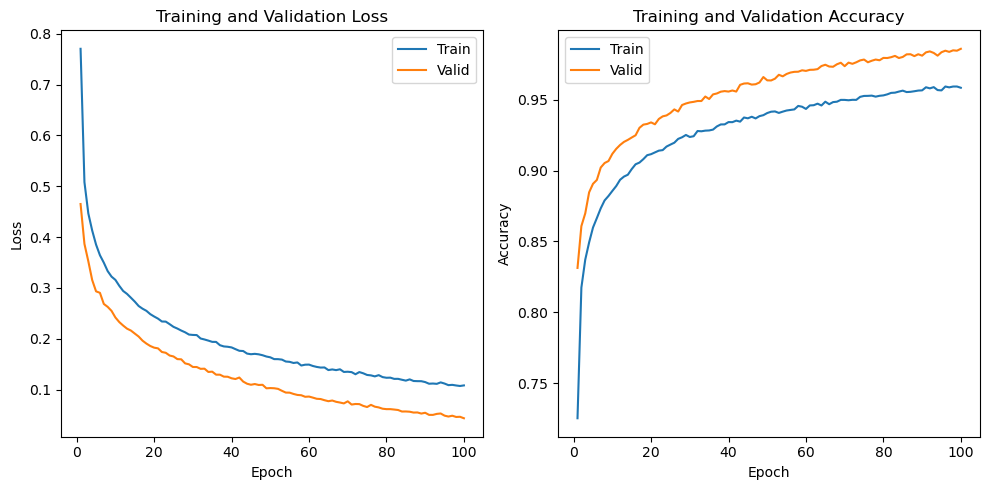

Test Accuracy: 93.66%
Precision: 0.9363
Recall: 0.9366
F1 Score: 0.9363


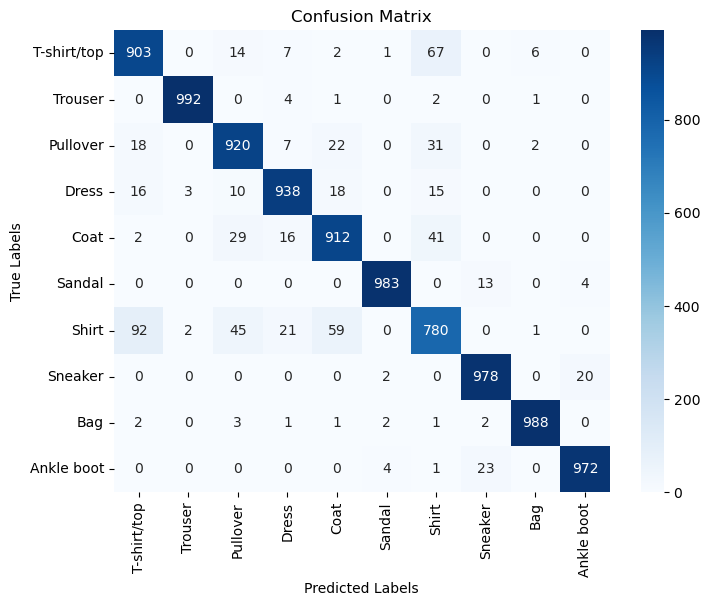

In [46]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deep_2.parameters(), lr=0.0001)

train_and_validate(model_deep_2, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_deep_2, test_loader, classes, seed=42)

In [47]:
class SecondCustomCNNWithDropout2(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super(SecondCustomCNNWithDropout2, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.pool(x)
        x = x.view(-1, 128 * 7 * 7)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
model_deep_3 = SecondCustomCNNWithDropout2()

Epoch [1/100], Train Loss: 0.7556, Train Acc: 72.90%, Valid Loss: 0.4512, Valid Acc: 83.65%
Epoch [2/100], Train Loss: 0.5014, Train Acc: 81.74%, Valid Loss: 0.3836, Valid Acc: 86.27%
Epoch [3/100], Train Loss: 0.4389, Train Acc: 84.16%, Valid Loss: 0.3484, Valid Acc: 87.22%
Epoch [4/100], Train Loss: 0.4039, Train Acc: 85.20%, Valid Loss: 0.3159, Valid Acc: 88.19%
Epoch [5/100], Train Loss: 0.3773, Train Acc: 86.33%, Valid Loss: 0.2978, Valid Acc: 89.07%
Epoch [6/100], Train Loss: 0.3568, Train Acc: 87.01%, Valid Loss: 0.2830, Valid Acc: 89.43%
Epoch [7/100], Train Loss: 0.3384, Train Acc: 87.57%, Valid Loss: 0.2673, Valid Acc: 90.41%
Epoch [8/100], Train Loss: 0.3271, Train Acc: 88.09%, Valid Loss: 0.2641, Valid Acc: 90.43%
Epoch [9/100], Train Loss: 0.3141, Train Acc: 88.61%, Valid Loss: 0.2528, Valid Acc: 90.78%
Epoch [10/100], Train Loss: 0.3050, Train Acc: 88.90%, Valid Loss: 0.2418, Valid Acc: 91.22%
Epoch [11/100], Train Loss: 0.2971, Train Acc: 89.22%, Valid Loss: 0.2370, Vali

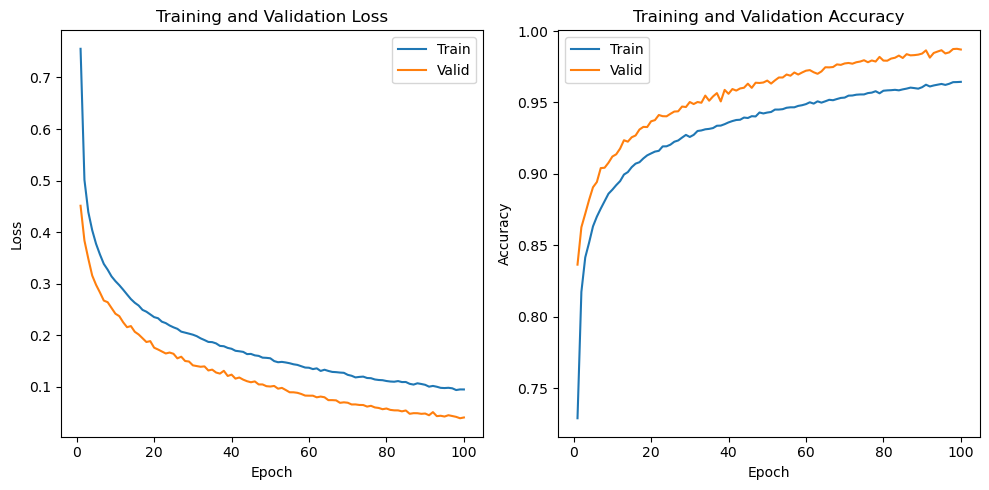

Test Accuracy: 93.60%
Precision: 0.9357
Recall: 0.9360
F1 Score: 0.9355


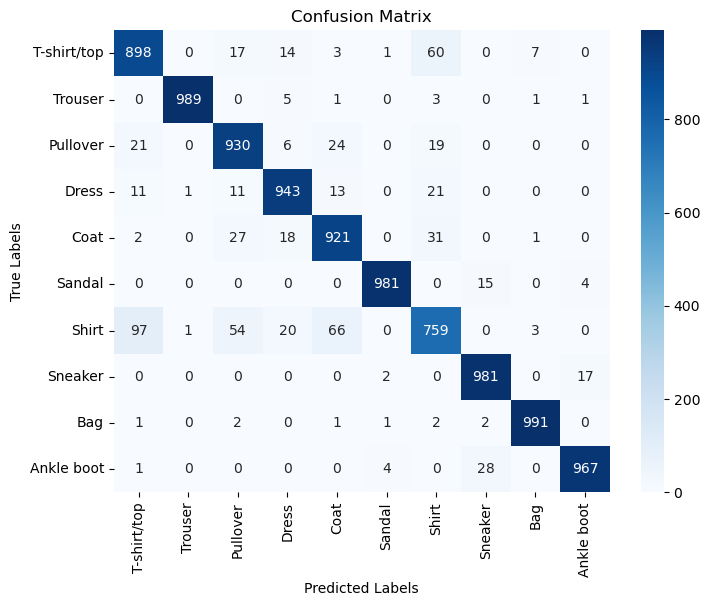

In [48]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deep_3.parameters(), lr=0.0001)

train_and_validate(model_deep_3, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_deep_3, test_loader, classes, seed=42)

In [49]:
class SecondCustomCNNWithBatchNorm(nn.Module):
    def __init__(self):
        super(SecondCustomCNNWithBatchNorm, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.relu4 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool(x)
        x = x.view(-1, 128 * 7 * 7)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.fc2(x)
        return x
    
model_deep_4 = SecondCustomCNNWithBatchNorm()

Epoch [1/100], Train Loss: 0.4722, Train Acc: 83.01%, Valid Loss: 0.3171, Valid Acc: 88.81%
Epoch [2/100], Train Loss: 0.3269, Train Acc: 88.13%, Valid Loss: 0.2927, Valid Acc: 89.62%
Epoch [3/100], Train Loss: 0.2888, Train Acc: 89.52%, Valid Loss: 0.2471, Valid Acc: 90.90%
Epoch [4/100], Train Loss: 0.2643, Train Acc: 90.32%, Valid Loss: 0.2288, Valid Acc: 91.60%
Epoch [5/100], Train Loss: 0.2441, Train Acc: 91.05%, Valid Loss: 0.2100, Valid Acc: 92.47%
Epoch [6/100], Train Loss: 0.2321, Train Acc: 91.52%, Valid Loss: 0.1874, Valid Acc: 93.37%
Epoch [7/100], Train Loss: 0.2224, Train Acc: 91.80%, Valid Loss: 0.1902, Valid Acc: 92.99%
Epoch [8/100], Train Loss: 0.2097, Train Acc: 92.30%, Valid Loss: 0.1718, Valid Acc: 93.80%
Epoch [9/100], Train Loss: 0.2009, Train Acc: 92.60%, Valid Loss: 0.1672, Valid Acc: 93.95%
Epoch [10/100], Train Loss: 0.1958, Train Acc: 92.83%, Valid Loss: 0.1558, Valid Acc: 94.23%
Epoch [11/100], Train Loss: 0.1855, Train Acc: 93.10%, Valid Loss: 0.1497, Vali

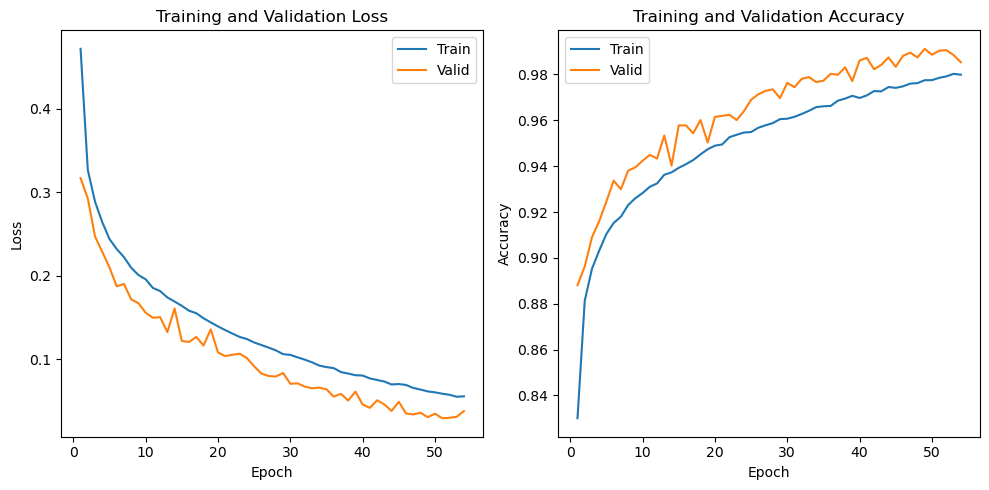

Test Accuracy: 93.41%
Precision: 0.9352
Recall: 0.9341
F1 Score: 0.9334


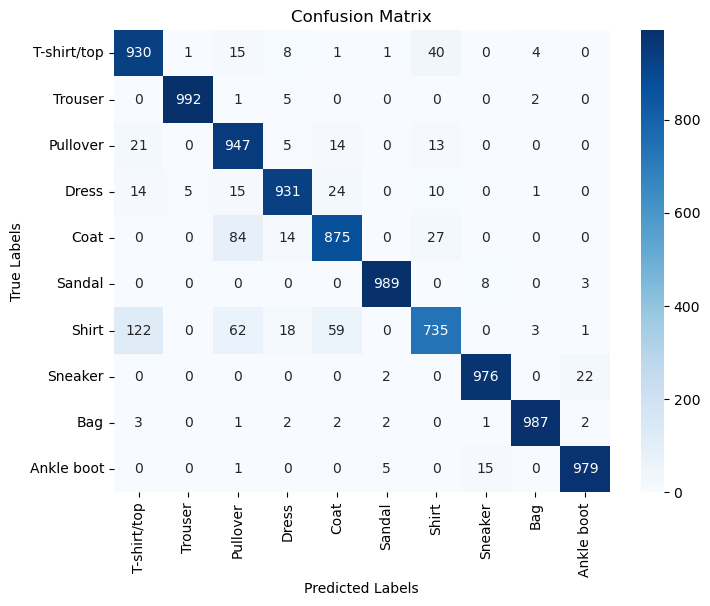

In [50]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deep_4.parameters(), lr=0.0001)

train_and_validate(model_deep_4, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_deep_4, test_loader, classes, seed=42)

In [51]:
class SecondCustomCNNWithBatchNormAndDropout(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super(SecondCustomCNNWithBatchNormAndDropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(128 * 7 * 7, 256)
        self.relu4 = nn.ReLU()
        self.dropout = nn.Dropout(dropout_prob)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.pool(x)
        x = x.view(-1, 128 * 7 * 7)
        x = self.fc1(x)
        x = self.relu4(x)
        x = self.dropout(x)
        x = self.fc2(x)
        return x
    
model_deep_5 = SecondCustomCNNWithBatchNormAndDropout()

Epoch [1/100], Train Loss: 0.5696, Train Acc: 79.81%, Valid Loss: 0.3340, Valid Acc: 87.78%
Epoch [2/100], Train Loss: 0.3889, Train Acc: 86.04%, Valid Loss: 0.2912, Valid Acc: 89.39%
Epoch [3/100], Train Loss: 0.3415, Train Acc: 87.53%, Valid Loss: 0.2575, Valid Acc: 90.72%
Epoch [4/100], Train Loss: 0.3112, Train Acc: 88.78%, Valid Loss: 0.2546, Valid Acc: 90.65%
Epoch [5/100], Train Loss: 0.2933, Train Acc: 89.44%, Valid Loss: 0.2213, Valid Acc: 91.72%
Epoch [6/100], Train Loss: 0.2802, Train Acc: 89.81%, Valid Loss: 0.2137, Valid Acc: 92.17%
Epoch [7/100], Train Loss: 0.2662, Train Acc: 90.20%, Valid Loss: 0.2001, Valid Acc: 92.82%
Epoch [8/100], Train Loss: 0.2577, Train Acc: 90.65%, Valid Loss: 0.2007, Valid Acc: 92.74%
Epoch [9/100], Train Loss: 0.2507, Train Acc: 90.89%, Valid Loss: 0.1964, Valid Acc: 92.84%
Epoch [10/100], Train Loss: 0.2423, Train Acc: 91.04%, Valid Loss: 0.1816, Valid Acc: 93.54%
Epoch [11/100], Train Loss: 0.2369, Train Acc: 91.32%, Valid Loss: 0.1790, Vali

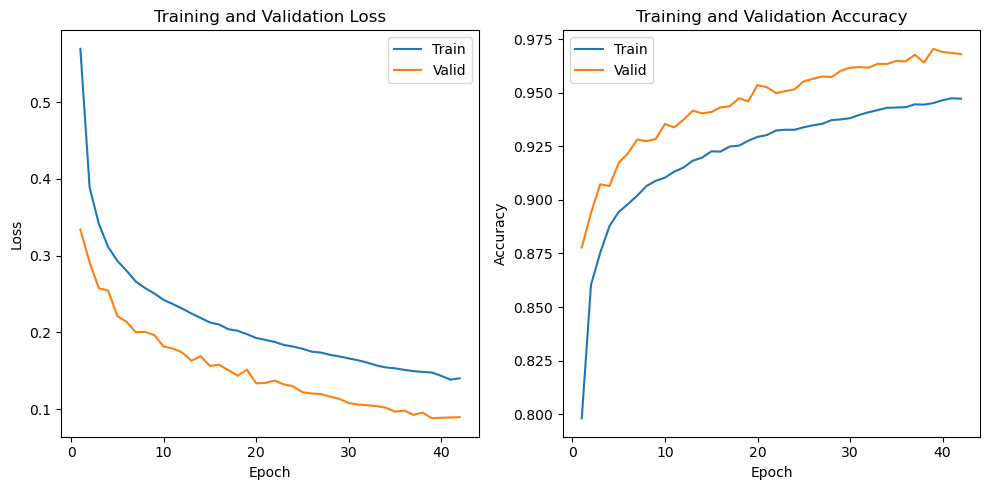

Test Accuracy: 93.94%
Precision: 0.9392
Recall: 0.9394
F1 Score: 0.9390


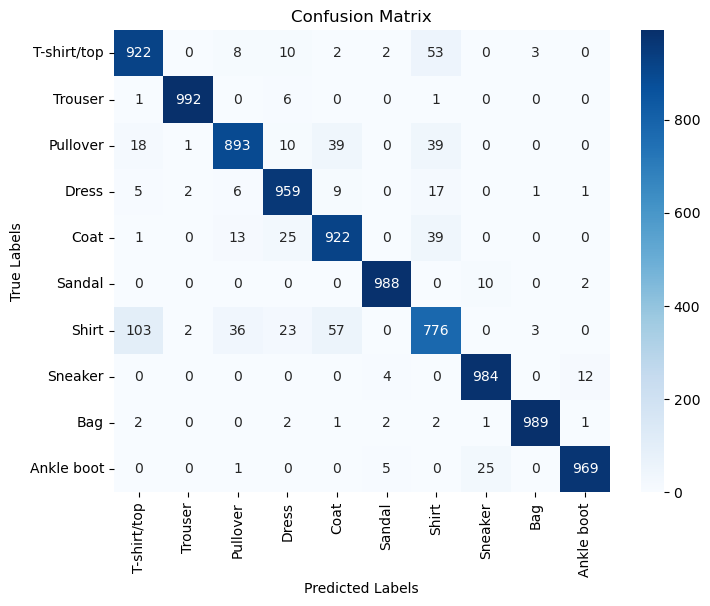

In [52]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_deep_5.parameters(), lr=0.0001)

train_and_validate(model_deep_5, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_deep_5, test_loader, classes, seed=42)

### terza rete
è la seconda con un conv in piu

In [53]:
class ThirdCNN(nn.Module):
    def __init__(self):
        super(ThirdCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 7 * 7, 256)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool(x)
        x = x.view(-1, 256 * 7 * 7)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.fc2(x)
        return x
    
model_third = ThirdCNN()

Epoch [1/100], Train Loss: 0.6247, Train Acc: 77.47%, Valid Loss: 0.3967, Valid Acc: 86.03%
Epoch [2/100], Train Loss: 0.3994, Train Acc: 85.54%, Valid Loss: 0.3484, Valid Acc: 87.73%
Epoch [3/100], Train Loss: 0.3439, Train Acc: 87.47%, Valid Loss: 0.3049, Valid Acc: 89.01%
Epoch [4/100], Train Loss: 0.3118, Train Acc: 88.57%, Valid Loss: 0.2948, Valid Acc: 89.23%
Epoch [5/100], Train Loss: 0.2841, Train Acc: 89.60%, Valid Loss: 0.2435, Valid Acc: 91.35%
Epoch [6/100], Train Loss: 0.2649, Train Acc: 90.27%, Valid Loss: 0.2371, Valid Acc: 91.52%
Epoch [7/100], Train Loss: 0.2463, Train Acc: 90.95%, Valid Loss: 0.2085, Valid Acc: 92.62%
Epoch [8/100], Train Loss: 0.2315, Train Acc: 91.50%, Valid Loss: 0.2122, Valid Acc: 92.47%
Epoch [9/100], Train Loss: 0.2202, Train Acc: 92.00%, Valid Loss: 0.1917, Valid Acc: 93.45%
Epoch [10/100], Train Loss: 0.2108, Train Acc: 92.21%, Valid Loss: 0.1844, Valid Acc: 93.38%
Epoch [11/100], Train Loss: 0.2001, Train Acc: 92.61%, Valid Loss: 0.1711, Vali

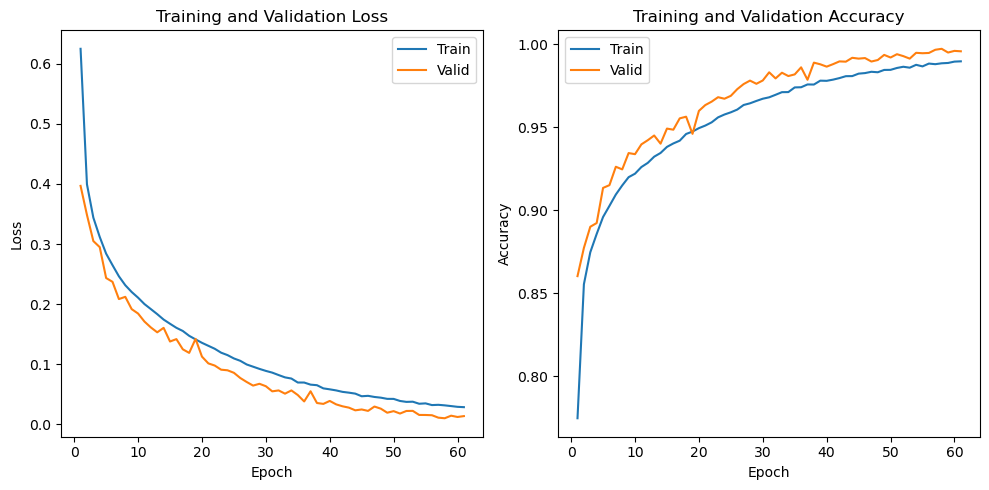

Test Accuracy: 93.37%
Precision: 0.9338
Recall: 0.9337
F1 Score: 0.9337


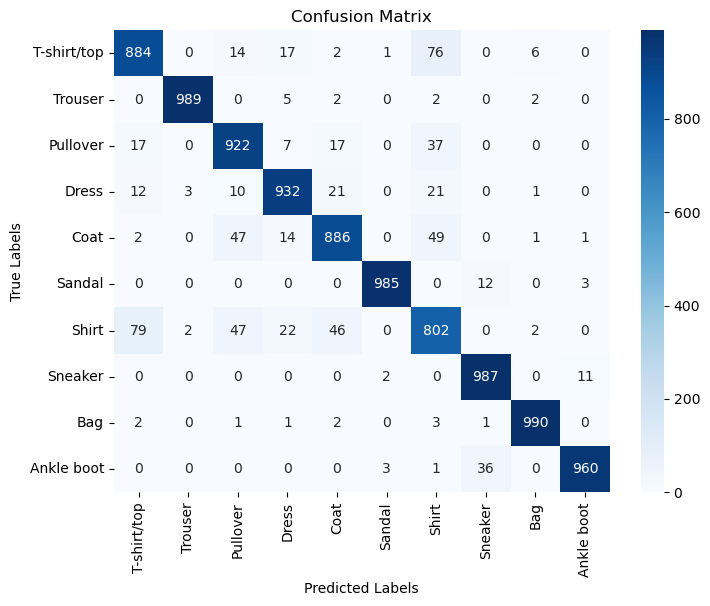

In [54]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_third.parameters(), lr=0.0001)

train_and_validate(model_third, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_third, test_loader, classes, seed=42)

In [55]:
class ThirdCNNWithL2Regularization(nn.Module):
    def __init__(self, reg_lambda=0.01):
        super(ThirdCNNWithL2Regularization, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 7 * 7, 256)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)
        self.reg_lambda = reg_lambda

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool(x)
        x = x.view(-1, 256 * 7 * 7)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.fc2(x)
        return x

    def l2_regularization(self):
        l2_reg = 0.0
        for param in self.parameters():
            l2_reg += torch.norm(param)**2
        return self.reg_lambda * l2_reg
    
model_third_l2 = ThirdCNNWithL2Regularization()

Epoch [1/100], Train Loss: 0.6241, Train Acc: 77.59%, Valid Loss: 0.3943, Valid Acc: 86.01%
Epoch [2/100], Train Loss: 0.3988, Train Acc: 85.58%, Valid Loss: 0.3497, Valid Acc: 87.55%
Epoch [3/100], Train Loss: 0.3439, Train Acc: 87.47%, Valid Loss: 0.3050, Valid Acc: 88.95%
Epoch [4/100], Train Loss: 0.3123, Train Acc: 88.55%, Valid Loss: 0.2948, Valid Acc: 89.20%
Epoch [5/100], Train Loss: 0.2838, Train Acc: 89.59%, Valid Loss: 0.2416, Valid Acc: 91.31%
Epoch [6/100], Train Loss: 0.2648, Train Acc: 90.24%, Valid Loss: 0.2412, Valid Acc: 91.35%
Epoch [7/100], Train Loss: 0.2461, Train Acc: 90.91%, Valid Loss: 0.2084, Valid Acc: 92.56%
Epoch [8/100], Train Loss: 0.2315, Train Acc: 91.51%, Valid Loss: 0.2137, Valid Acc: 92.39%
Epoch [9/100], Train Loss: 0.2202, Train Acc: 91.91%, Valid Loss: 0.1895, Valid Acc: 93.64%
Epoch [10/100], Train Loss: 0.2104, Train Acc: 92.20%, Valid Loss: 0.1861, Valid Acc: 93.25%
Epoch [11/100], Train Loss: 0.1998, Train Acc: 92.66%, Valid Loss: 0.1725, Vali

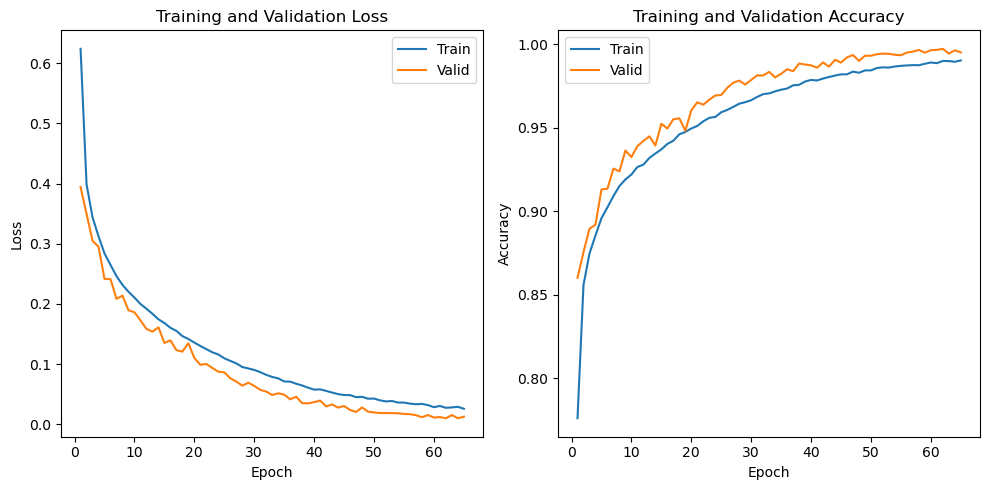

Test Accuracy: 93.54%
Precision: 0.9357
Recall: 0.9354
F1 Score: 0.9355


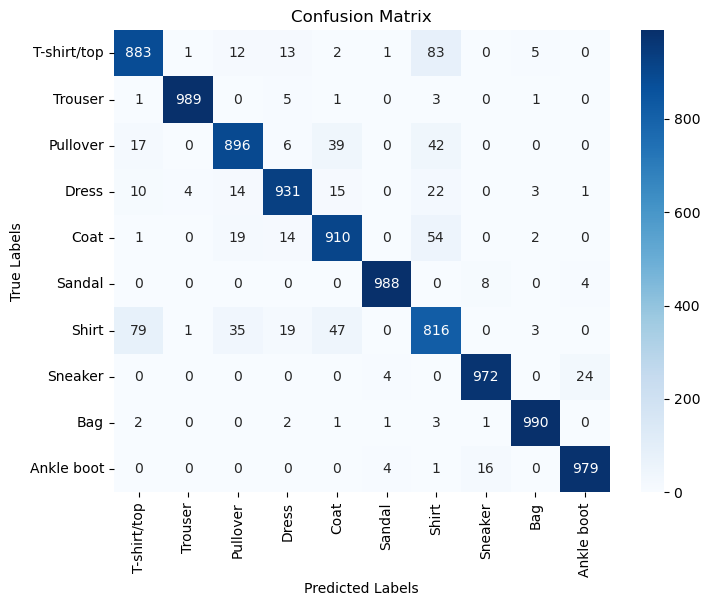

In [56]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_third_l2.parameters(), lr=0.0001)

train_and_validate(model_third_l2, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_third_l2, test_loader, classes, seed=42)

In [57]:
class ThirdCNNWithDropout(nn.Module):
    def __init__(self, dropout_prob_conv=0.1, dropout_prob_fc=0.5):
        super(ThirdCNNWithDropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.dropout1 = nn.Dropout2d(dropout_prob_conv)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.dropout2 = nn.Dropout2d(dropout_prob_conv)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.dropout3 = nn.Dropout2d(dropout_prob_conv)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.dropout4 = nn.Dropout2d(dropout_prob_conv)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 7 * 7, 256)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)
        self.dropout_fc = nn.Dropout(dropout_prob_fc)

    def forward(self, x):
        x = self.conv1(x)
        x = self.dropout1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.dropout2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.dropout3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.dropout4(x)
        x = self.relu4(x)
        x = self.pool(x)
        x = x.view(-1, 256 * 7 * 7)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.dropout_fc(x)
        x = self.fc2(x)
        return x
    
model_third_dropout = ThirdCNNWithDropout()

Epoch [1/100], Train Loss: 0.7569, Train Acc: 72.89%, Valid Loss: 0.4312, Valid Acc: 84.03%
Epoch [2/100], Train Loss: 0.4911, Train Acc: 82.39%, Valid Loss: 0.3626, Valid Acc: 86.78%
Epoch [3/100], Train Loss: 0.4308, Train Acc: 84.50%, Valid Loss: 0.3400, Valid Acc: 87.40%
Epoch [4/100], Train Loss: 0.3981, Train Acc: 85.59%, Valid Loss: 0.3048, Valid Acc: 88.69%
Epoch [5/100], Train Loss: 0.3709, Train Acc: 86.52%, Valid Loss: 0.2753, Valid Acc: 89.74%
Epoch [6/100], Train Loss: 0.3491, Train Acc: 87.39%, Valid Loss: 0.2717, Valid Acc: 89.89%
Epoch [7/100], Train Loss: 0.3320, Train Acc: 87.95%, Valid Loss: 0.2526, Valid Acc: 90.82%
Epoch [8/100], Train Loss: 0.3194, Train Acc: 88.29%, Valid Loss: 0.2424, Valid Acc: 91.09%
Epoch [9/100], Train Loss: 0.3041, Train Acc: 89.06%, Valid Loss: 0.2312, Valid Acc: 91.57%
Epoch [10/100], Train Loss: 0.2920, Train Acc: 89.43%, Valid Loss: 0.2215, Valid Acc: 91.83%
Epoch [11/100], Train Loss: 0.2841, Train Acc: 89.70%, Valid Loss: 0.2106, Vali

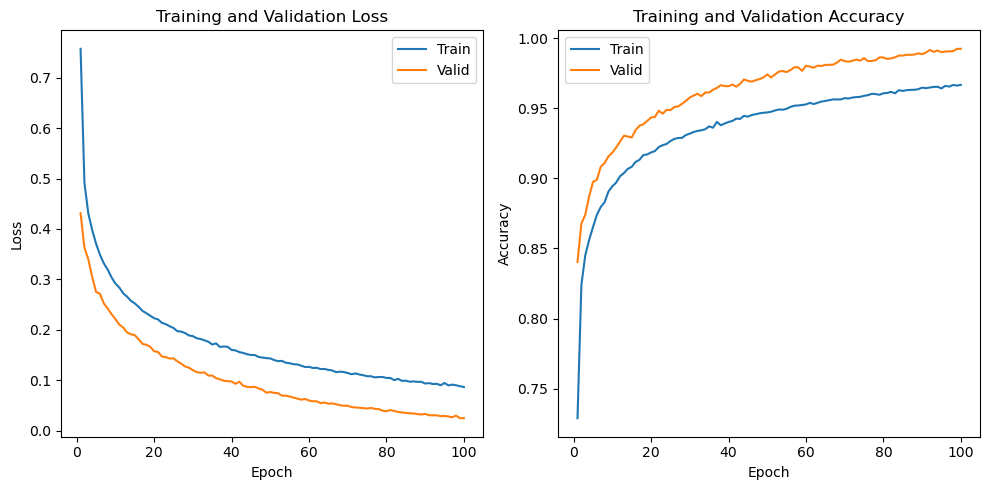

Test Accuracy: 94.15%
Precision: 0.9414
Recall: 0.9415
F1 Score: 0.9415


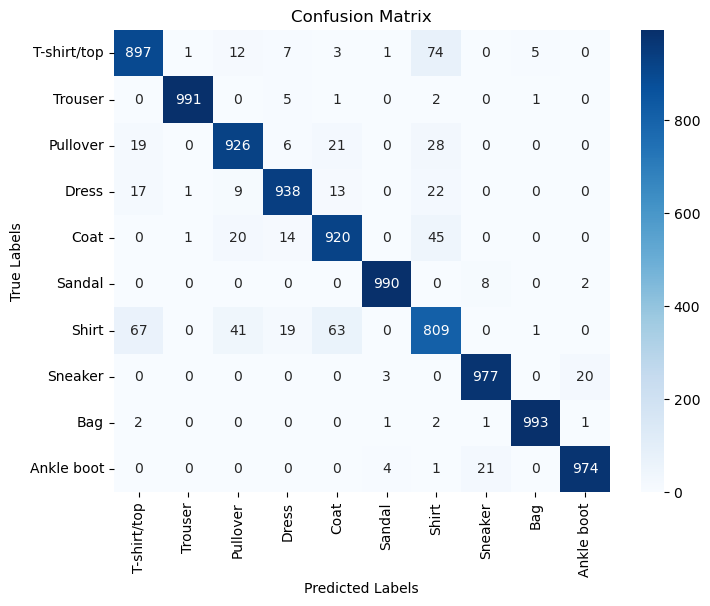

In [58]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_third_dropout.parameters(), lr=0.0001)

train_and_validate(model_third_dropout, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_third_dropout, test_loader, classes, seed=42)

In [59]:
class ThirdCNNWithDropoutBetweenFc(nn.Module):
    def __init__(self, dropout_prob_fc=0.5):
        super(ThirdCNNWithDropoutBetweenFc, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 7 * 7, 256)
        self.relu5 = nn.ReLU()
        self.dropout_fc = nn.Dropout(dropout_prob_fc)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool(x)
        x = x.view(-1, 256 * 7 * 7)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.fc2(x)
        x = self.dropout_fc(x)
        return x
    
model_third_dropout_fc = ThirdCNNWithDropoutBetweenFc()

Epoch [1/100], Train Loss: 1.3409, Train Acc: 47.69%, Valid Loss: 0.5082, Valid Acc: 84.87%
Epoch [2/100], Train Loss: 1.1792, Train Acc: 51.58%, Valid Loss: 0.4127, Valid Acc: 87.49%
Epoch [3/100], Train Loss: 1.1357, Train Acc: 52.82%, Valid Loss: 0.3701, Valid Acc: 87.74%
Epoch [4/100], Train Loss: 1.1068, Train Acc: 53.42%, Valid Loss: 0.3239, Valid Acc: 89.38%
Epoch [5/100], Train Loss: 1.0818, Train Acc: 54.11%, Valid Loss: 0.3156, Valid Acc: 89.17%
Epoch [6/100], Train Loss: 1.0738, Train Acc: 54.09%, Valid Loss: 0.2844, Valid Acc: 91.05%
Epoch [7/100], Train Loss: 1.0547, Train Acc: 54.73%, Valid Loss: 0.2744, Valid Acc: 90.52%
Epoch [8/100], Train Loss: 1.0387, Train Acc: 55.17%, Valid Loss: 0.2596, Valid Acc: 91.29%
Epoch [9/100], Train Loss: 1.0328, Train Acc: 55.32%, Valid Loss: 0.2373, Valid Acc: 92.34%
Epoch [10/100], Train Loss: 1.0176, Train Acc: 55.72%, Valid Loss: 0.2375, Valid Acc: 92.64%
Epoch [11/100], Train Loss: 1.0176, Train Acc: 55.64%, Valid Loss: 0.2311, Vali

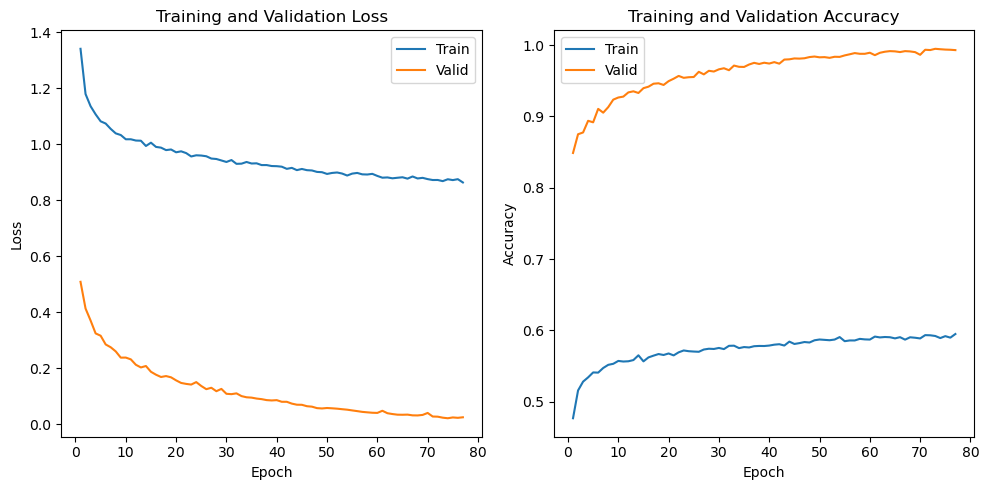

Test Accuracy: 93.40%
Precision: 0.9355
Recall: 0.9340
F1 Score: 0.9344


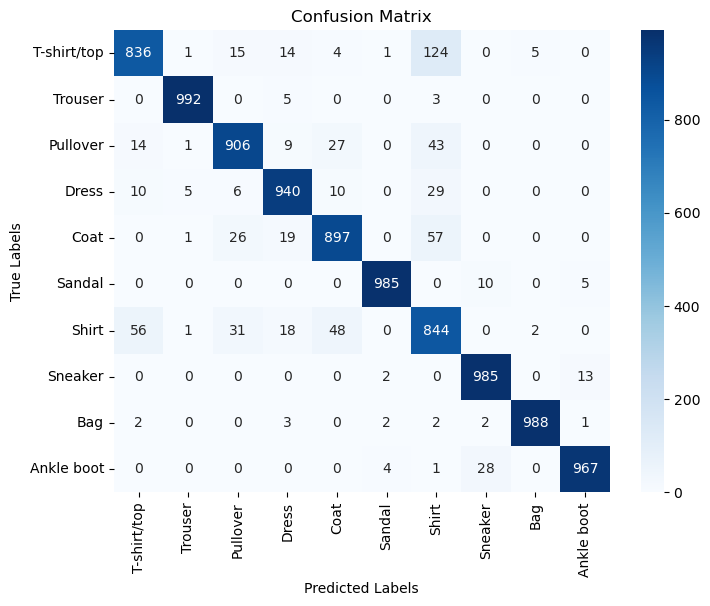

In [60]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_third_dropout_fc.parameters(), lr=0.0001)

train_and_validate(model_third_dropout_fc, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_third_dropout_fc, test_loader, classes, seed=42)

In [61]:
class ThirdCNNWithBatchNorm(nn.Module):
    def __init__(self):
        super(ThirdCNNWithBatchNorm, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 7 * 7, 256)
        self.relu5 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        x = self.pool(x)
        x = x.view(-1, 256 * 7 * 7)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.fc2(x)
        return x
    
model_third_bn = ThirdCNNWithBatchNorm()

Epoch [1/100], Train Loss: 0.4456, Train Acc: 83.86%, Valid Loss: 0.3227, Valid Acc: 88.28%
Epoch [2/100], Train Loss: 0.3040, Train Acc: 89.10%, Valid Loss: 0.2545, Valid Acc: 90.91%
Epoch [3/100], Train Loss: 0.2682, Train Acc: 90.15%, Valid Loss: 0.2309, Valid Acc: 91.42%
Epoch [4/100], Train Loss: 0.2453, Train Acc: 91.04%, Valid Loss: 0.2173, Valid Acc: 92.17%
Epoch [5/100], Train Loss: 0.2226, Train Acc: 91.91%, Valid Loss: 0.1802, Valid Acc: 93.58%
Epoch [6/100], Train Loss: 0.2123, Train Acc: 92.22%, Valid Loss: 0.1676, Valid Acc: 94.07%
Epoch [7/100], Train Loss: 0.2003, Train Acc: 92.56%, Valid Loss: 0.1745, Valid Acc: 93.64%
Epoch [8/100], Train Loss: 0.1896, Train Acc: 92.99%, Valid Loss: 0.1486, Valid Acc: 94.47%
Epoch [9/100], Train Loss: 0.1808, Train Acc: 93.34%, Valid Loss: 0.1507, Valid Acc: 94.54%
Epoch [10/100], Train Loss: 0.1734, Train Acc: 93.62%, Valid Loss: 0.1356, Valid Acc: 95.01%
Epoch [11/100], Train Loss: 0.1649, Train Acc: 93.83%, Valid Loss: 0.1251, Vali

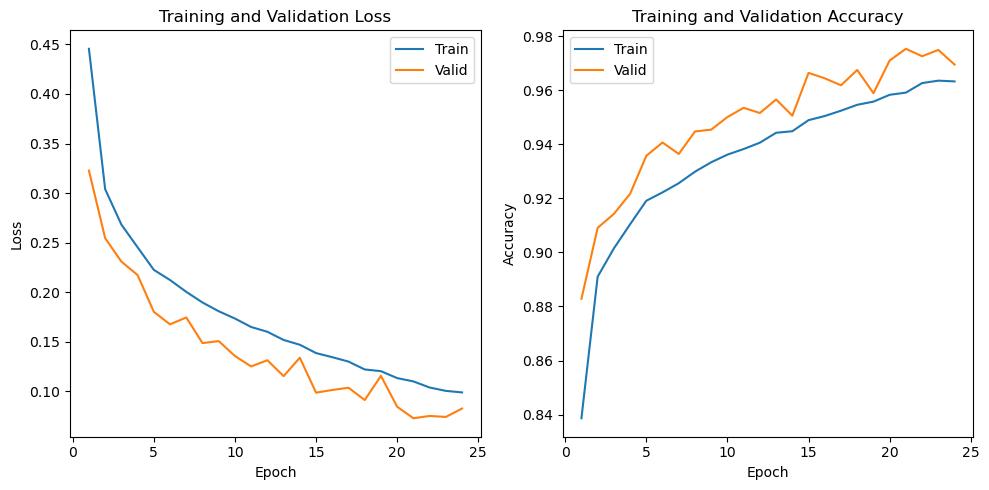

Test Accuracy: 93.09%
Precision: 0.9327
Recall: 0.9309
F1 Score: 0.9310


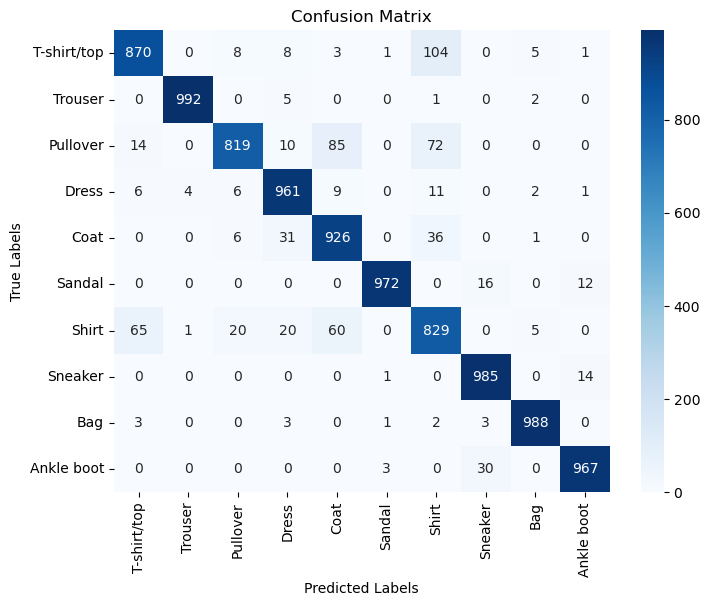

In [62]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_third_bn.parameters(), lr=0.0001)

train_and_validate(model_third_bn, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_third_bn, test_loader, classes, seed=42)

In [63]:
class ThirdCNNWithBatchNormAndDropout(nn.Module):
    def __init__(self, dropout_prob_fc=0.5):
        super(ThirdCNNWithBatchNormAndDropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.bn1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.bn3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.bn4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(256 * 7 * 7, 256)
        self.relu5 = nn.ReLU()
        self.dropout_fc = nn.Dropout(dropout_prob_fc)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.bn3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.bn4(x)
        x = self.relu4(x)
        x = self.pool(x)
        x = x.view(-1, 256 * 7 * 7)
        x = self.fc1(x)
        x = self.relu5(x)
        x = self.dropout_fc(x)
        x = self.fc2(x)
        return x
    
model_third_bn_dropout = ThirdCNNWithBatchNormAndDropout()

Epoch [1/100], Train Loss: 0.5505, Train Acc: 80.36%, Valid Loss: 0.3030, Valid Acc: 88.73%
Epoch [2/100], Train Loss: 0.3677, Train Acc: 86.72%, Valid Loss: 0.2638, Valid Acc: 90.31%
Epoch [3/100], Train Loss: 0.3196, Train Acc: 88.58%, Valid Loss: 0.2393, Valid Acc: 91.33%
Epoch [4/100], Train Loss: 0.2968, Train Acc: 89.31%, Valid Loss: 0.2205, Valid Acc: 92.25%
Epoch [5/100], Train Loss: 0.2786, Train Acc: 89.97%, Valid Loss: 0.2002, Valid Acc: 92.89%
Epoch [6/100], Train Loss: 0.2627, Train Acc: 90.43%, Valid Loss: 0.1926, Valid Acc: 93.00%
Epoch [7/100], Train Loss: 0.2516, Train Acc: 91.02%, Valid Loss: 0.1930, Valid Acc: 92.96%
Epoch [8/100], Train Loss: 0.2408, Train Acc: 91.34%, Valid Loss: 0.1796, Valid Acc: 93.38%
Epoch [9/100], Train Loss: 0.2338, Train Acc: 91.54%, Valid Loss: 0.1778, Valid Acc: 93.31%
Epoch [10/100], Train Loss: 0.2270, Train Acc: 91.86%, Valid Loss: 0.1613, Valid Acc: 94.02%
Epoch [11/100], Train Loss: 0.2205, Train Acc: 92.09%, Valid Loss: 0.1631, Vali

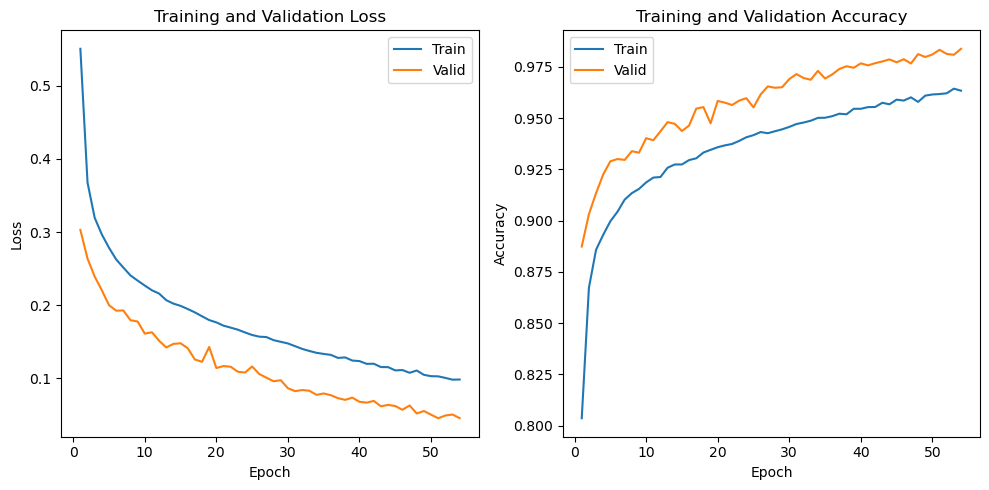

Test Accuracy: 94.15%
Precision: 0.9414
Recall: 0.9415
F1 Score: 0.9414


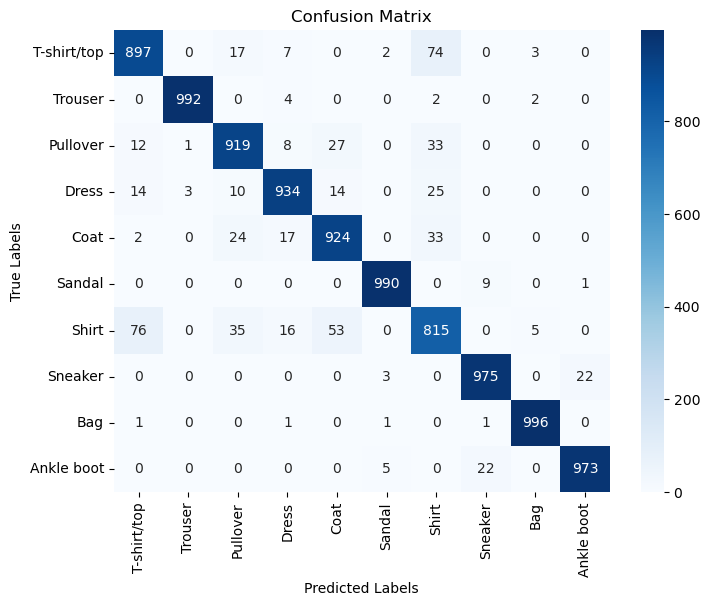

In [64]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_third_bn_dropout.parameters(), lr=0.0001)

train_and_validate(model_third_bn_dropout, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_third_bn_dropout, test_loader, classes, seed=42)

### quarta rete

In [65]:
class FourthCNN(nn.Module):
    def __init__(self):
        super(FourthCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Nuovo blocco
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu6 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(512 * 3 * 3, 256)  
        self.relu7 = nn.ReLU()
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool(x)
        
        x = self.conv5(x)
        x = self.relu5(x)
        x = self.conv6(x)
        x = self.relu6(x)
        x = self.pool2(x)
        
        x = x.view(-1, 512 * 3 * 3)  
        x = self.fc1(x)
        x = self.relu7(x)
        x = self.fc2(x)
        return x

model_fourth = FourthCNN()

Epoch [1/100], Train Loss: 0.6732, Train Acc: 75.28%, Valid Loss: 0.4445, Valid Acc: 83.95%
Epoch [2/100], Train Loss: 0.4197, Train Acc: 84.47%, Valid Loss: 0.3610, Valid Acc: 86.58%
Epoch [3/100], Train Loss: 0.3586, Train Acc: 86.57%, Valid Loss: 0.3440, Valid Acc: 87.28%
Epoch [4/100], Train Loss: 0.3198, Train Acc: 88.23%, Valid Loss: 0.2801, Valid Acc: 89.88%
Epoch [5/100], Train Loss: 0.2907, Train Acc: 89.17%, Valid Loss: 0.2590, Valid Acc: 90.54%
Epoch [6/100], Train Loss: 0.2707, Train Acc: 89.92%, Valid Loss: 0.2471, Valid Acc: 90.88%
Epoch [7/100], Train Loss: 0.2537, Train Acc: 90.51%, Valid Loss: 0.2111, Valid Acc: 92.35%
Epoch [8/100], Train Loss: 0.2397, Train Acc: 91.07%, Valid Loss: 0.2039, Valid Acc: 92.47%
Epoch [9/100], Train Loss: 0.2274, Train Acc: 91.53%, Valid Loss: 0.1940, Valid Acc: 92.79%
Epoch [10/100], Train Loss: 0.2180, Train Acc: 91.86%, Valid Loss: 0.1877, Valid Acc: 93.03%
Epoch [11/100], Train Loss: 0.2074, Train Acc: 92.21%, Valid Loss: 0.1757, Vali

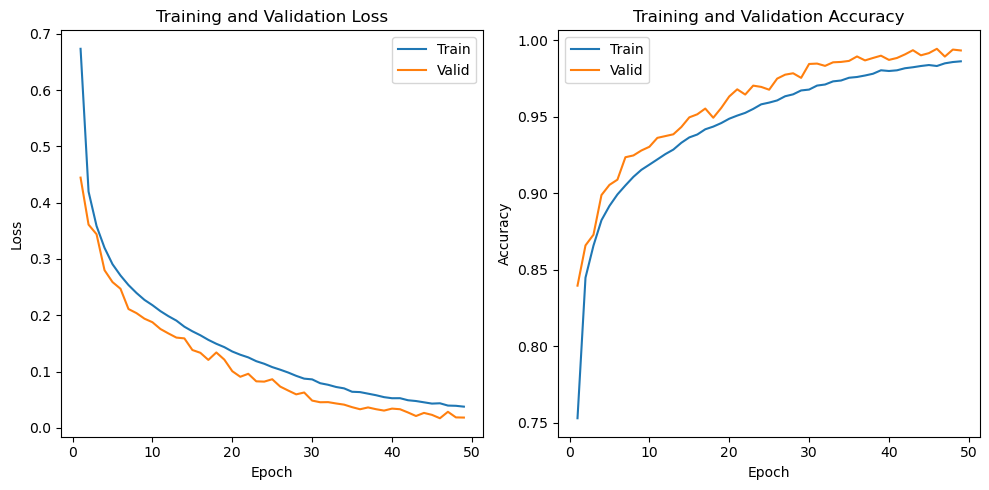

Test Accuracy: 92.87%
Precision: 0.9287
Recall: 0.9287
F1 Score: 0.9283


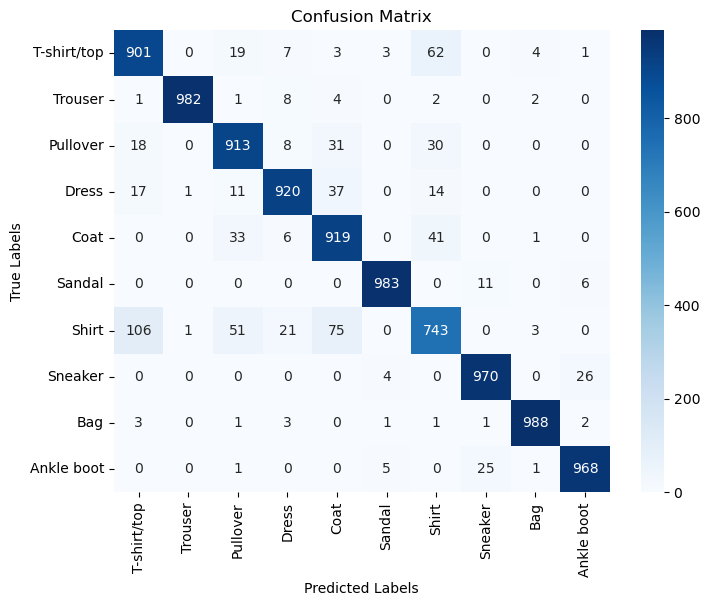

In [66]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fourth.parameters(), lr=0.0001)

train_and_validate(model_fourth, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_fourth, test_loader, classes, seed=42)

In [67]:
class FourthCNN_L2(nn.Module):
    def __init__(self, l2_lambda=0.01):
        super(FourthCNN_L2, self).__init__()
        self.model = FourthCNN()
        self.l2_lambda = l2_lambda

    def forward(self, x):
        return self.model(x)

    def l2_regularization_loss(self):
        l2_loss = 0.0
        for param in self.model.parameters():
            l2_loss += torch.norm(param, p=2)**2
        l2_loss *= 0.5 * self.l2_lambda
        return l2_loss

model_fourth_l2 = FourthCNN_L2()

Epoch [1/100], Train Loss: 0.6717, Train Acc: 75.34%, Valid Loss: 0.4426, Valid Acc: 83.90%
Epoch [2/100], Train Loss: 0.4187, Train Acc: 84.56%, Valid Loss: 0.3686, Valid Acc: 86.42%
Epoch [3/100], Train Loss: 0.3590, Train Acc: 86.54%, Valid Loss: 0.3438, Valid Acc: 87.12%
Epoch [4/100], Train Loss: 0.3195, Train Acc: 88.26%, Valid Loss: 0.2873, Valid Acc: 89.56%
Epoch [5/100], Train Loss: 0.2910, Train Acc: 89.10%, Valid Loss: 0.2536, Valid Acc: 90.76%
Epoch [6/100], Train Loss: 0.2703, Train Acc: 89.96%, Valid Loss: 0.2498, Valid Acc: 90.97%
Epoch [7/100], Train Loss: 0.2546, Train Acc: 90.48%, Valid Loss: 0.2124, Valid Acc: 92.33%
Epoch [8/100], Train Loss: 0.2403, Train Acc: 91.07%, Valid Loss: 0.2043, Valid Acc: 92.44%
Epoch [9/100], Train Loss: 0.2276, Train Acc: 91.53%, Valid Loss: 0.1934, Valid Acc: 92.90%
Epoch [10/100], Train Loss: 0.2185, Train Acc: 91.86%, Valid Loss: 0.1861, Valid Acc: 93.05%
Epoch [11/100], Train Loss: 0.2074, Train Acc: 92.23%, Valid Loss: 0.1762, Vali

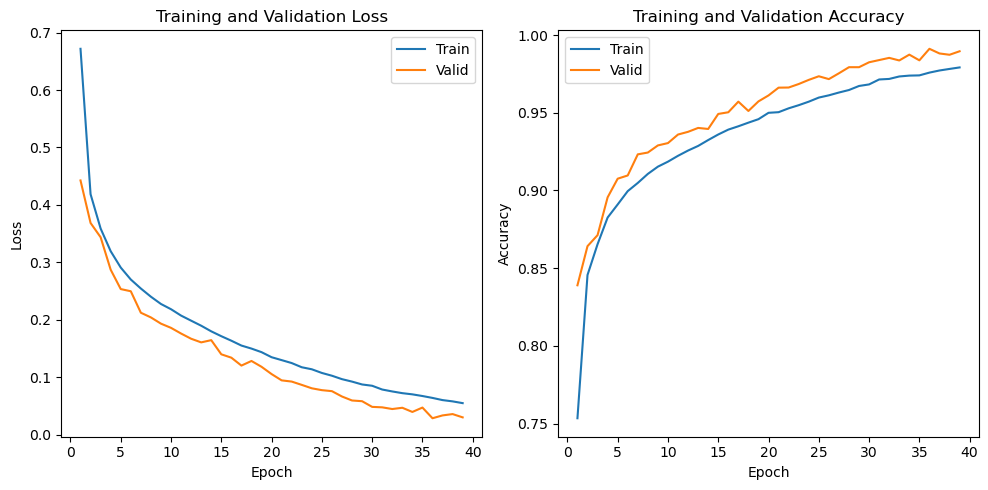

Test Accuracy: 93.20%
Precision: 0.9315
Recall: 0.9320
F1 Score: 0.9315


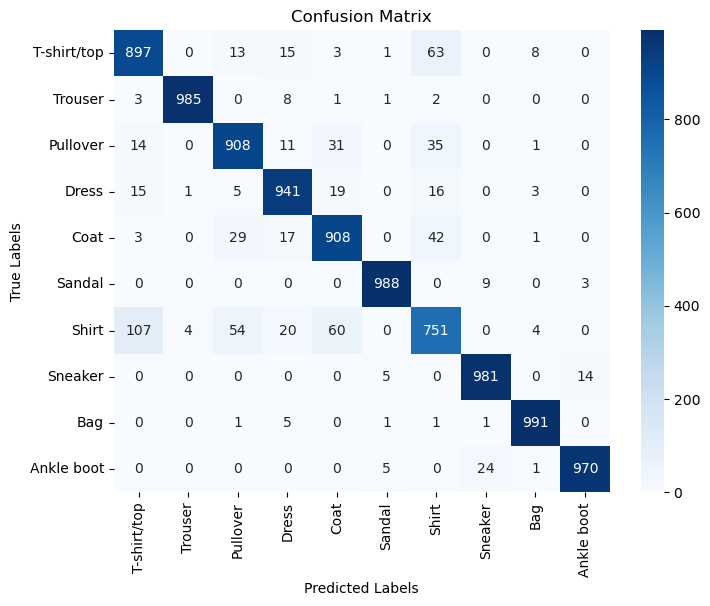

In [68]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fourth_l2.parameters(), lr=0.0001)

train_and_validate(model_fourth_l2, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_fourth_l2, test_loader, classes, seed=42)

In [69]:
class FourthCNNdropout_fc(nn.Module):
    def __init__(self, dropout_prob=0.5):
        super(FourthCNNdropout_fc, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu6 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(512 * 3 * 3, 256)  
        self.relu7 = nn.ReLU()
        self.fc_dropout = nn.Dropout(dropout_prob)  
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool(x)
        
        x = self.conv5(x)
        x = self.relu5(x)
        x = self.conv6(x)
        x = self.relu6(x)
        x = self.pool2(x)
        
        x = x.view(-1, 512 * 3 * 3)  
        x = self.fc1(x)
        x = self.relu7(x)
        x = self.fc_dropout(x)  
        x = self.fc2(x)
        return x

model_fourth_dropout_fc = FourthCNNdropout_fc()

Epoch [1/100], Train Loss: 0.7784, Train Acc: 71.58%, Valid Loss: 0.4816, Valid Acc: 81.50%
Epoch [2/100], Train Loss: 0.4937, Train Acc: 81.96%, Valid Loss: 0.3750, Valid Acc: 86.10%
Epoch [3/100], Train Loss: 0.4135, Train Acc: 84.86%, Valid Loss: 0.3515, Valid Acc: 86.59%
Epoch [4/100], Train Loss: 0.3738, Train Acc: 86.29%, Valid Loss: 0.3229, Valid Acc: 88.01%
Epoch [5/100], Train Loss: 0.3396, Train Acc: 87.58%, Valid Loss: 0.2817, Valid Acc: 89.41%
Epoch [6/100], Train Loss: 0.3181, Train Acc: 88.41%, Valid Loss: 0.2575, Valid Acc: 90.51%
Epoch [7/100], Train Loss: 0.2986, Train Acc: 89.04%, Valid Loss: 0.2348, Valid Acc: 91.47%
Epoch [8/100], Train Loss: 0.2837, Train Acc: 89.48%, Valid Loss: 0.2305, Valid Acc: 91.57%
Epoch [9/100], Train Loss: 0.2720, Train Acc: 90.04%, Valid Loss: 0.2214, Valid Acc: 91.69%
Epoch [10/100], Train Loss: 0.2595, Train Acc: 90.58%, Valid Loss: 0.2219, Valid Acc: 91.53%
Epoch [11/100], Train Loss: 0.2493, Train Acc: 90.90%, Valid Loss: 0.1990, Vali

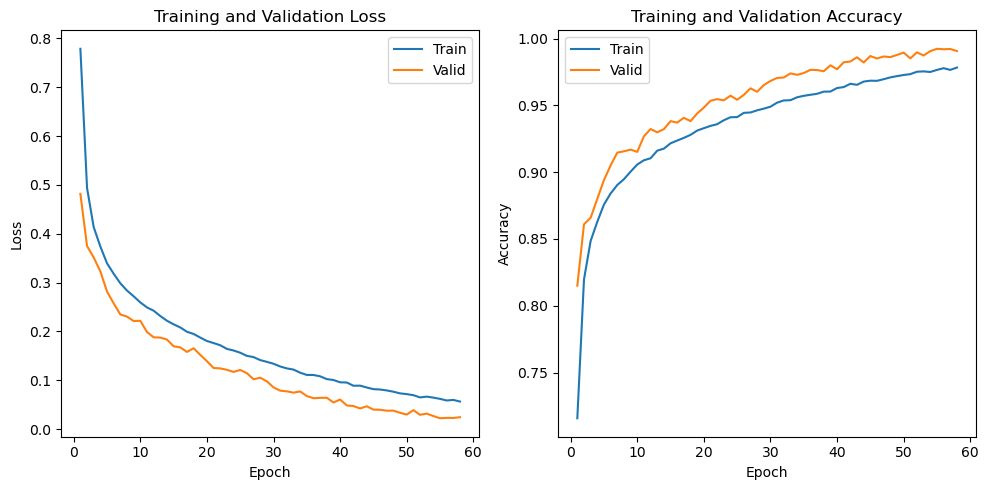

Test Accuracy: 93.15%
Precision: 0.9312
Recall: 0.9315
F1 Score: 0.9309


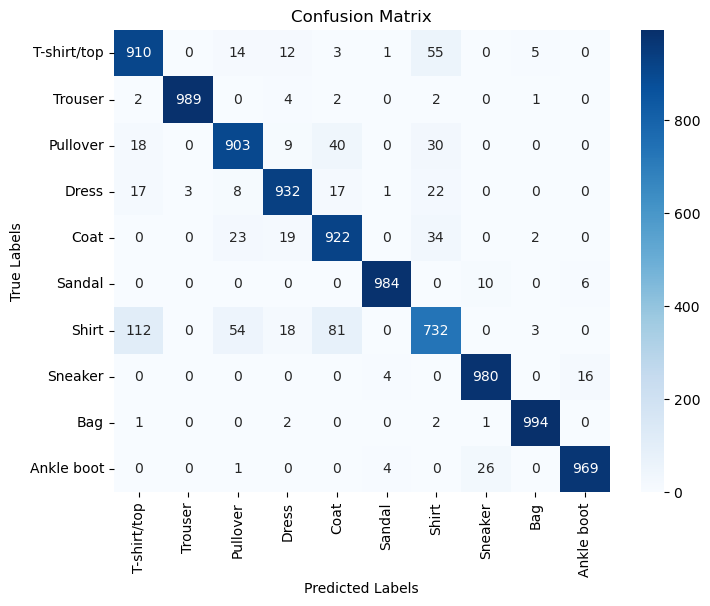

In [70]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fourth_dropout_fc.parameters(), lr=0.0001)

train_and_validate(model_fourth_dropout_fc, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_fourth_dropout_fc, test_loader, classes, seed=42)

In [71]:
class FourthCNN_drop(nn.Module):
    def __init__(self, dropout_conv_prob=0.2, dropout_fc_prob=0.5):
        super(FourthCNN_drop, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Nuovo blocco
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.relu6 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(512 * 3 * 3, 256)  # Aggiornato il numero di feature
        self.relu7 = nn.ReLU()
        self.dropout_conv = nn.Dropout(dropout_conv_prob)  # Dropout per i layer convoluzionali
        self.dropout_fc = nn.Dropout(dropout_fc_prob)  # Dropout per i layer completamente connessi
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.dropout_conv(x)  # Dropout applicato ai layer convoluzionali
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.relu3(x)
        x = self.dropout_conv(x)  # Dropout applicato ai layer convoluzionali
        x = self.conv4(x)
        x = self.relu4(x)
        x = self.pool(x)
        
        # Nuovo blocco
        x = self.conv5(x)
        x = self.relu5(x)
        x = self.dropout_conv(x)  # Dropout applicato ai layer convoluzionali
        x = self.conv6(x)
        x = self.relu6(x)
        x = self.pool2(x)
        
        x = x.view(-1, 512 * 3 * 3)  # Aggiornato il numero di feature
        x = self.fc1(x)
        x = self.relu7(x)
        x = self.dropout_fc(x)  # Dropout applicato ai layer completamente connessi
        x = self.fc2(x)
        return x

model_fourth = FourthCNN_drop()

Epoch [1/100], Train Loss: 0.7958, Train Acc: 70.83%, Valid Loss: 0.5451, Valid Acc: 81.32%
Epoch [2/100], Train Loss: 0.5158, Train Acc: 81.23%, Valid Loss: 0.4279, Valid Acc: 85.67%
Epoch [3/100], Train Loss: 0.4437, Train Acc: 83.73%, Valid Loss: 0.3754, Valid Acc: 85.97%
Epoch [4/100], Train Loss: 0.4014, Train Acc: 85.31%, Valid Loss: 0.3341, Valid Acc: 88.27%
Epoch [5/100], Train Loss: 0.3680, Train Acc: 86.44%, Valid Loss: 0.3043, Valid Acc: 89.06%
Epoch [6/100], Train Loss: 0.3419, Train Acc: 87.53%, Valid Loss: 0.2899, Valid Acc: 89.48%
Epoch [7/100], Train Loss: 0.3244, Train Acc: 88.11%, Valid Loss: 0.2679, Valid Acc: 90.53%
Epoch [8/100], Train Loss: 0.3089, Train Acc: 88.61%, Valid Loss: 0.2661, Valid Acc: 90.38%
Epoch [9/100], Train Loss: 0.2967, Train Acc: 89.19%, Valid Loss: 0.2502, Valid Acc: 90.83%
Epoch [10/100], Train Loss: 0.2868, Train Acc: 89.48%, Valid Loss: 0.2445, Valid Acc: 91.58%
Epoch [11/100], Train Loss: 0.2744, Train Acc: 89.98%, Valid Loss: 0.2323, Vali

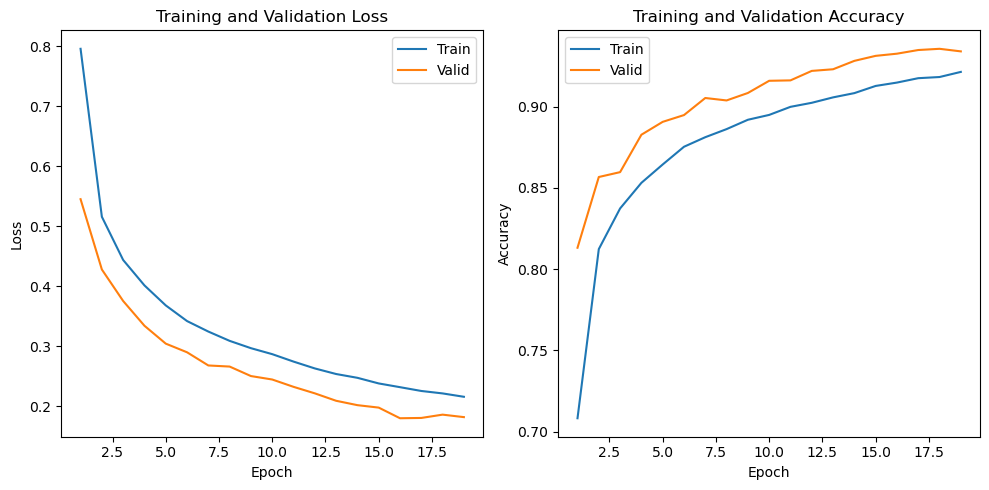

Test Accuracy: 91.11%
Precision: 0.9121
Recall: 0.9111
F1 Score: 0.9104


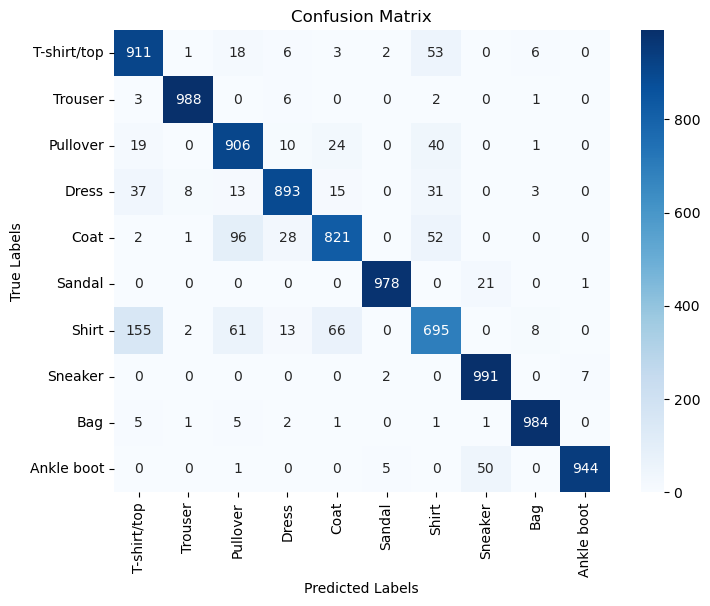

In [72]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fourth.parameters(), lr=0.0001)

train_and_validate(model_fourth, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_fourth, test_loader, classes, seed=42)

In [73]:
class FourthCNNBatchNorm(nn.Module):
    def __init__(self, dropout_conv_prob=0.2, dropout_fc_prob=0.5):
        super(FourthCNNBatchNorm, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.batchnorm4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Nuovo blocco
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.batchnorm5 = nn.BatchNorm2d(512)
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.batchnorm6 = nn.BatchNorm2d(512)
        self.relu6 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(512 * 3 * 3, 256)  # Aggiornato il numero di feature
        self.batchnorm7 = nn.BatchNorm1d(256)
        self.relu7 = nn.ReLU()
        self.dropout_conv = nn.Dropout(dropout_conv_prob)  # Dropout per i layer convoluzionali
        self.dropout_fc = nn.Dropout(dropout_fc_prob)  # Dropout per i layer completamente connessi
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.relu1(x)
        x = self.dropout_conv(x)  # Dropout applicato ai layer convoluzionali
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.batchnorm3(x)
        x = self.relu3(x)
        x = self.dropout_conv(x)  # Dropout applicato ai layer convoluzionali
        x = self.conv4(x)
        x = self.batchnorm4(x)
        x = self.relu4(x)
        x = self.pool(x)
        
        # Nuovo blocco
        x = self.conv5(x)
        x = self.batchnorm5(x)
        x = self.relu5(x)
        x = self.dropout_conv(x)  # Dropout applicato ai layer convoluzionali
        x = self.conv6(x)
        x = self.batchnorm6(x)
        x = self.relu6(x)
        x = self.pool2(x)
        
        x = x.view(-1, 512 * 3 * 3)  # Aggiornato il numero di feature
        x = self.fc1(x)
        x = self.batchnorm7(x)
        x = self.relu7(x)
        x = self.dropout_fc(x)  # Dropout applicato ai layer completamente connessi
        x = self.fc2(x)
        return x

model_fourth_batchnorm = FourthCNNBatchNorm()

Epoch [1/100], Train Loss: 0.5672, Train Acc: 81.08%, Valid Loss: 0.3841, Valid Acc: 86.24%
Epoch [2/100], Train Loss: 0.3671, Train Acc: 87.09%, Valid Loss: 0.3030, Valid Acc: 89.30%
Epoch [3/100], Train Loss: 0.3172, Train Acc: 88.64%, Valid Loss: 0.2723, Valid Acc: 90.18%
Epoch [4/100], Train Loss: 0.2888, Train Acc: 89.74%, Valid Loss: 0.2842, Valid Acc: 89.91%
Epoch [5/100], Train Loss: 0.2663, Train Acc: 90.55%, Valid Loss: 0.2147, Valid Acc: 92.10%
Epoch [6/100], Train Loss: 0.2537, Train Acc: 90.91%, Valid Loss: 0.2053, Valid Acc: 92.62%
Epoch [7/100], Train Loss: 0.2372, Train Acc: 91.47%, Valid Loss: 0.1817, Valid Acc: 93.53%
Epoch [8/100], Train Loss: 0.2255, Train Acc: 91.75%, Valid Loss: 0.2044, Valid Acc: 92.69%
Epoch [9/100], Train Loss: 0.2209, Train Acc: 91.99%, Valid Loss: 0.1920, Valid Acc: 92.92%
Epoch [10/100], Train Loss: 0.2097, Train Acc: 92.33%, Valid Loss: 0.1595, Valid Acc: 94.21%
Epoch [11/100], Train Loss: 0.2011, Train Acc: 92.70%, Valid Loss: 0.1567, Vali

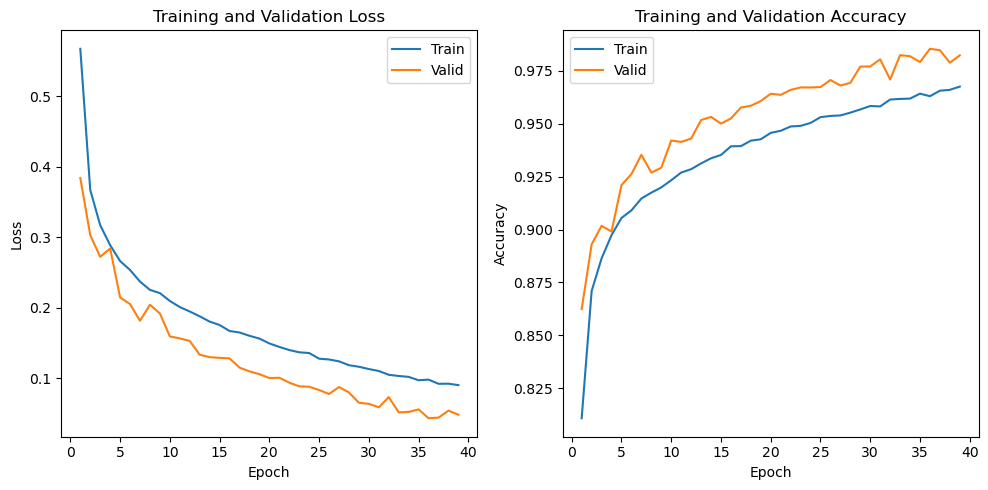

Test Accuracy: 93.65%
Precision: 0.9371
Recall: 0.9365
F1 Score: 0.9359


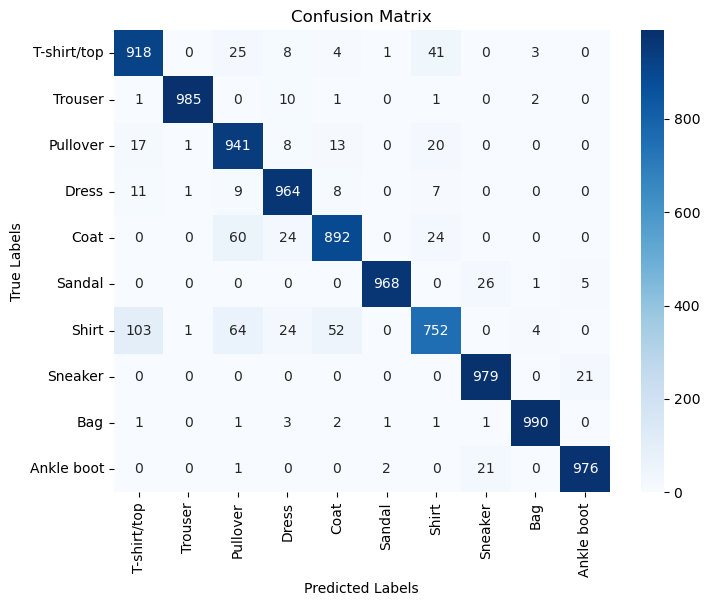

In [74]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fourth_batchnorm.parameters(), lr=0.0001)

train_and_validate(model_fourth_batchnorm, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_fourth_batchnorm, test_loader, classes, seed=42)

In [75]:
class FourthCNNBatchNormDropout(nn.Module):
    def __init__(self, dropout_conv_prob=0.2, dropout_fc_prob=0.5):
        super(FourthCNNBatchNormDropout, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.batchnorm1 = nn.BatchNorm2d(32)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.batchnorm2 = nn.BatchNorm2d(64)
        self.relu2 = nn.ReLU()
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1)
        self.batchnorm3 = nn.BatchNorm2d(128)
        self.relu3 = nn.ReLU()
        self.conv4 = nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1)
        self.batchnorm4 = nn.BatchNorm2d(256)
        self.relu4 = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        
        # Nuovo blocco
        self.conv5 = nn.Conv2d(in_channels=256, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.batchnorm5 = nn.BatchNorm2d(512)
        self.relu5 = nn.ReLU()
        self.conv6 = nn.Conv2d(in_channels=512, out_channels=512, kernel_size=3, stride=1, padding=1)
        self.batchnorm6 = nn.BatchNorm2d(512)
        self.relu6 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        self.fc1 = nn.Linear(512 * 3 * 3, 256)  # Aggiornato il numero di feature
        self.batchnorm7 = nn.BatchNorm1d(256)
        self.relu7 = nn.ReLU()
        self.dropout_fc = nn.Dropout(dropout_fc_prob)  # Dropout per i layer completamente connessi
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.batchnorm1(x)
        x = self.relu1(x)
        x = self.conv2(x)
        x = self.batchnorm2(x)
        x = self.relu2(x)
        x = self.pool(x)
        x = self.conv3(x)
        x = self.batchnorm3(x)
        x = self.relu3(x)
        x = self.conv4(x)
        x = self.batchnorm4(x)
        x = self.relu4(x)
        x = self.pool(x)
        
        # Nuovo blocco
        x = self.conv5(x)
        x = self.batchnorm5(x)
        x = self.relu5(x)
        x = self.conv6(x)
        x = self.batchnorm6(x)
        x = self.relu6(x)
        x = self.pool2(x)
        
        x = x.view(-1, 512 * 3 * 3)  # Aggiornato il numero di feature
        x = self.fc1(x)
        x = self.batchnorm7(x)
        x = self.relu7(x)
        x = self.dropout_fc(x)  # Dropout applicato ai layer completamente connessi
        x = self.fc2(x)
        return x

model_fourth_batchnorm_dropout = FourthCNNBatchNormDropout()

Epoch [1/100], Train Loss: 0.4758, Train Acc: 84.48%, Valid Loss: 0.2735, Valid Acc: 90.52%
Epoch [2/100], Train Loss: 0.3085, Train Acc: 89.38%, Valid Loss: 0.2253, Valid Acc: 92.09%
Epoch [3/100], Train Loss: 0.2656, Train Acc: 90.68%, Valid Loss: 0.1972, Valid Acc: 93.12%
Epoch [4/100], Train Loss: 0.2415, Train Acc: 91.53%, Valid Loss: 0.1819, Valid Acc: 93.33%
Epoch [5/100], Train Loss: 0.2170, Train Acc: 92.23%, Valid Loss: 0.1524, Valid Acc: 94.47%
Epoch [6/100], Train Loss: 0.2050, Train Acc: 92.70%, Valid Loss: 0.1479, Valid Acc: 94.61%
Epoch [7/100], Train Loss: 0.1909, Train Acc: 93.25%, Valid Loss: 0.1303, Valid Acc: 95.52%
Epoch [8/100], Train Loss: 0.1791, Train Acc: 93.55%, Valid Loss: 0.1246, Valid Acc: 95.67%
Epoch [9/100], Train Loss: 0.1706, Train Acc: 93.88%, Valid Loss: 0.1190, Valid Acc: 95.86%
Epoch [10/100], Train Loss: 0.1617, Train Acc: 94.20%, Valid Loss: 0.1052, Valid Acc: 96.23%
Epoch [11/100], Train Loss: 0.1489, Train Acc: 94.66%, Valid Loss: 0.1001, Vali

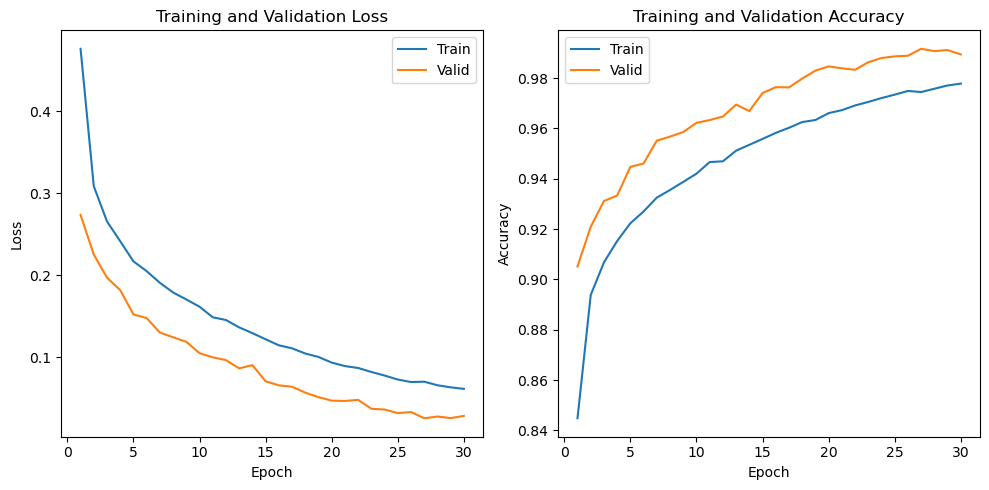

Test Accuracy: 93.73%
Precision: 0.9373
Recall: 0.9373
F1 Score: 0.9367


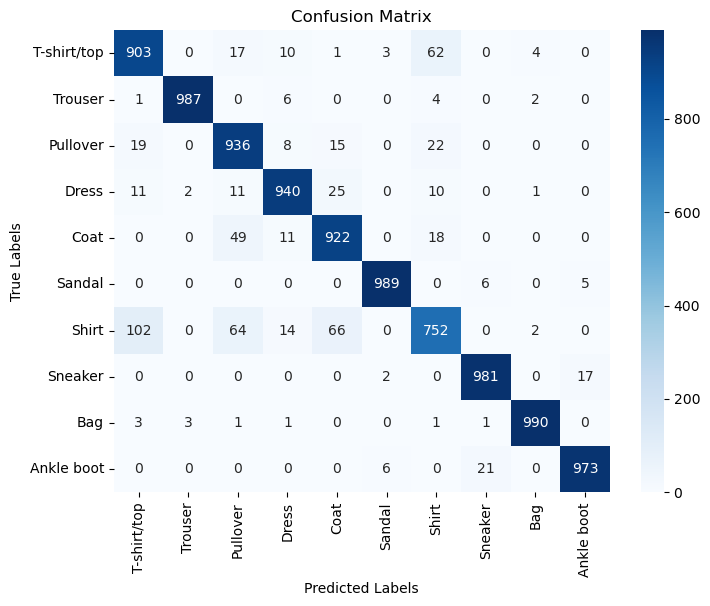

In [76]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fourth_batchnorm_dropout.parameters(), lr=0.0001)

train_and_validate(model_fourth_batchnorm_dropout, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=3, plot=True, seed=42)

test_model(model_fourth_batchnorm_dropout, test_loader, classes, seed=42)

# Transfer Learning

d:\anaconda3\envs\deepenv\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
d:\anaconda3\envs\deepenv\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNeXt50_32X4D_Weights.IMAGENET1K_V1`. You can also use `weights=ResNeXt50_32X4D_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/100], Train Loss: 0.6025, Train Acc: 78.95%, Valid Loss: 0.3990, Valid Acc: 84.52%
Epoch [2/100], Train Loss: 0.4252, Train Acc: 85.14%, Valid Loss: 0.6078, Valid Acc: 79.15%
Epoch [3/100], Train Loss: 0.4446, Train Acc: 84.41%, Valid Loss: 0.3333, Valid Acc: 87.83%
Epoch [4/100], Train Loss: 0.3353, Train Acc: 87.66%, Valid Loss: 0.3453, Valid Acc: 87.99%
Epoch [5/100], Train Loss: 0.3210, Train Acc: 88.50%, Valid Loss: 0.2850, Valid Acc: 89.10%
Epoch [6/100], Train Loss: 0.3110, Train Acc: 88.67%, Valid Loss: 0.2696, Valid Acc: 90.51%
Epoch [7/100], Train Loss: 0.3348, Train Acc: 87.84%, Valid Loss: 0.4983, Valid Acc: 87.77%
Epoch [8/100], Train Loss: 0.2938, Train Acc: 89.18%, Valid Loss: 0.2757, Valid Acc: 89.46%
Epoch [9/100], Train Loss: 0.2671, Train Acc: 90.11%, Valid Loss: 0.2258, Valid Acc: 91.64%
Epoch [10/100], Train Loss: 0.2572, Train Acc: 90.45%, Valid Loss: 0.2296, Valid Acc: 91.52%
Epoch [11/100], Train Loss: 0.2545, Train Acc: 90.60%, Valid Loss: 0.2162, Vali

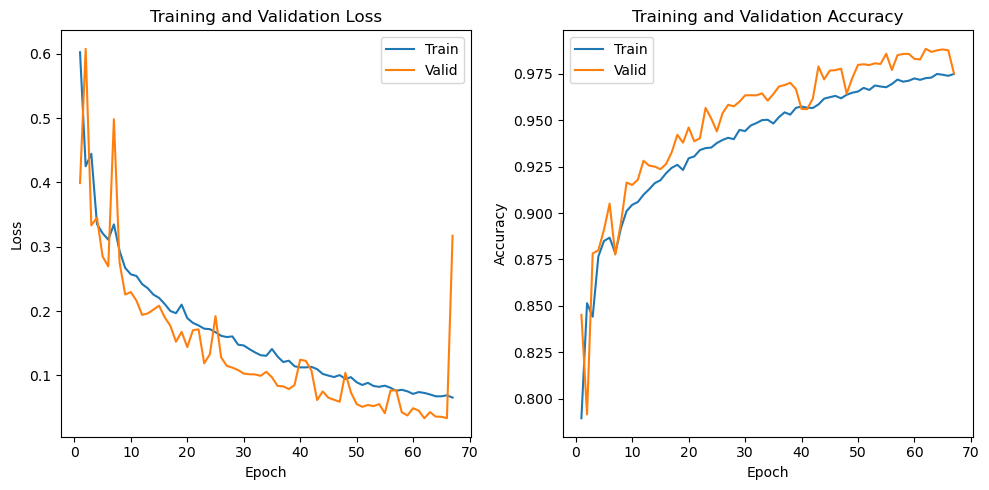

Test Accuracy: 91.27%
Precision: 0.9136
Recall: 0.9127
F1 Score: 0.9129


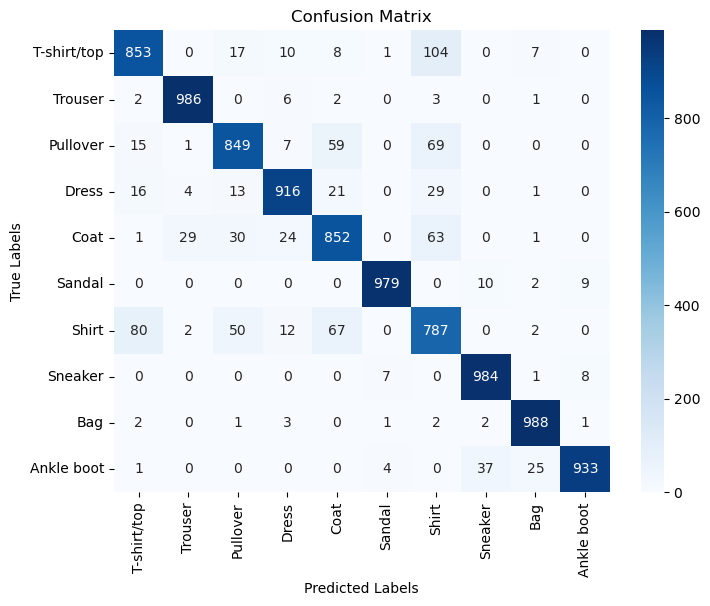

In [77]:
class ResNeXt50Gray(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNeXt50Gray, self).__init__()
        self.resnext = models.resnext50_32x4d(pretrained=True)
        self.resnext.conv1 = nn.Conv2d(1, 64, kernel_size=7, stride=2, padding=3, bias=False)
        num_ftrs = self.resnext.fc.in_features
        self.resnext.fc = nn.Linear(num_ftrs, num_classes)

    def forward(self, x):
        return self.resnext(x)
    
model_resnext = ResNeXt50Gray()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_resnext.parameters(), lr=0.001)

train_and_validate(model_resnext, train_loader, valid_loader, criterion, optimizer, num_epochs=100, patience=5, plot=True, seed=42)

test_model(model_resnext, test_loader, classes, seed=42)